# **<span style="color:#689f38;">Import the needed libraries</span>**


In [369]:
# General Imports
import os
import warnings
warnings.filterwarnings('ignore')
import sqlite3
from math import ceil
from itertools import product
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
import time

# Set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)

# Data Preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Wrapper Methods
from sklearn.feature_selection import RFE

# Embedded Methods
from sklearn.linear_model import LassoCV

# Modeling
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet
)

# Model Evaluation & Metrics
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error
)

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor  
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

# Decision Trees Visualization
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

# Neural Network
from sklearn.neural_network import MLPRegressor

# Feature Engineering
import matplotlib.ticker as ticker

# SVM
from scipy.stats import uniform, randint

#Pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.base import BaseEstimator, TransformerMixin


# **<span style="color:#689f38;">Data Understanding  and Preparation</span>**


### **<span style="color:#689f38;">Data Loading & Initial Preparation</span>**


In [54]:
#importing dataset 
cars = pd.read_csv('cars.csv', sep = ',')
cars.head(3)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.0,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.0,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.0,0.0


In [55]:
#importing test dataset
cars_test = pd.read_csv('test.csv', sep=',')
cars_test.head()

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


**<span style="color:#8bc34a;">Dataset Metadata</span>**

Below is a brief description of each variable available in the dataset:

- **carID** → Unique identifier for each car in the dataset.

- **Brand** → The main brand or manufacturer of the car (e.g., Ford, Toyota, BMW, Audi...).

- **model** → The specific model name of the car (e.g., Fiesta, A3, Corolla...).

- **year** → The year when the car was registered.

- **mileage** → The total distance the car has travelled, measured in miles.

- **tax** → The annual road tax (in £) applicable to the car in 2020.

- **fuelType** → The type of fuel used by the car (e.g., Petrol, Diesel, Hybrid, Electric).

- **mpg** → The average miles per gallon (fuel efficiency of the car).

- **engineSize** → The size of the engine in liters (cubic decimeters).

- **paintQuality%** → The mechanic’s assessment (in percentage) of the car’s paint quality and hull integrity.

- **previousOwners** → The number of previous registered owners of the car.

- **hasDamage** → Boolean flag indicating whether the car was reported as damaged by the seller (True/False).

- **price** → Target variable — the purchase price of the car by *Cars 4 You* (in £).


**<span style="color:#8bc34a;">General Inspection</span>**

In [4]:
cars.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [5]:
cars.describe(include='all').T #Get basic summary statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carID,75973.0,NaN,NaN,NaN,37986.0,21931.660338,0.0,18993.0,37986.0,56979.0,75972.0
Brand,74452,72,Ford,14808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,74456,735,Focus,6353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.096611,2.208704,1970.0,2016.0,2017.0,2019.0,2024.121759
price,75973.0,NaN,NaN,NaN,16881.889553,9736.926322,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,40,Manual,38050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74510.0,NaN,NaN,NaN,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.0
fuelType,74462,34,Petrol,37995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,68069.0,NaN,NaN,NaN,120.329078,65.521176,-91.12163,125.0,145.0,145.0,580.0
mpg,68047.0,NaN,NaN,NaN,55.152666,16.497837,-43.421768,46.3,54.3,62.8,470.8


In [6]:
cars.shape

(75973, 14)

In [7]:
cars.info() #more summary overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [8]:
cars.dtypes #checking data types

carID               int64
Brand              object
model              object
year              float64
price               int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage         float64
dtype: object

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">
  <strong>Data Cleaning & Validation Checklist</strong>

- **Check for misspelled values** and correct them (e.g., 'anual' → 'manual'), applies to categorical columns such as 'transmission' and 'fuelType'  

- **Verify and correct negative values** in numeric features (e.g., 'previousOwners' should not be negative)

- **Convert data types** to appropriate formats (e.g., integers, floats, booleans, datetime where needed)

- **Inspect and handle missing values (NaNs)** appropriately (decide whether to fill, drop, or impute) 

- **Explore multivariate relationships**, such as between 'tax' and 'year' (check correlations or visual relationships between variables)

- **Validate boolean variables** to ensure they contain only '0' and '1' (e.g., 'hasDamage' column)  


### **<span style="color:#689f38;"> Data Cleaning & Quality Assessment</span>**


In [56]:
cars.set_index('carID', inplace=True) #setting carID as index

In [57]:
cars_test.set_index('carID', inplace=True)

In [58]:
cars_test.head()

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [12]:
cars.head()

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


**<span style="color:#8bc34a;">Checking for missing values</span>**


In [13]:
cars.isnull().sum()

Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

In [14]:
cars_test.isnull().sum()

Brand              649
model              650
year               653
transmission       623
mileage            689
fuelType           656
tax               3308
mpg               3288
engineSize         628
paintQuality%      625
previousOwners     597
hasDamage          597
dtype: int64

**<span style="color:#8bc34a;">Identify and display all duplicated rows in dataset</span>**


In [59]:
#Show all rows that are part of a duplicated group (both original and duplicate)
duplicates_full = cars[cars.duplicated(keep=False)]

#Sort by something meaningful (e.g., carID) so duplicates appear together
duplicates_full = duplicates_full.sort_values(by=list(cars.columns))

#Display the duplicated rows
duplicates_full

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
23477,Ford,Focus,2017.0,14000,Automatic,9137.0,Petrol,NaN,NaN,1.0,48.0,4.0,0.0
25766,Ford,Focus,2017.0,14000,Automatic,9137.0,Petrol,NaN,NaN,1.0,48.0,4.0,0.0
15152,Ford,Focus,2018.0,13500,Manual,11382.0,Petrol,NaN,NaN,1.0,57.0,4.0,0.0
21404,Ford,Focus,2018.0,13500,Manual,11382.0,Petrol,NaN,NaN,1.0,57.0,4.0,0.0
33774,Hyundai,I10,2017.0,7500,Manual,NaN,Petrol,145.0,57.7,1.2,32.0,4.0,0.0
34128,Hyundai,I10,2017.0,7500,Manual,NaN,Petrol,145.0,57.7,1.2,32.0,4.0,0.0
33890,Hyundai,Ioniq,2019.0,23991,Automatic,5500.0,Hybrid,135.0,78.5,1.6,39.0,3.0,0.0
34301,Hyundai,Ioniq,2019.0,23991,Automatic,5500.0,Hybrid,135.0,78.5,1.6,39.0,3.0,0.0


In [60]:
cars.drop_duplicates(inplace=True) #dropping duplicated lines 

**<span style="color:#8bc34a;">Coherence variable check</span>**

In [61]:
cars.rename(columns={'Brand': 'brand'}, inplace=True)
cars_test.rename(columns={'Brand': 'brand'}, inplace=True)

In [62]:
non_metric_features = ["brand", "model", "transmission", "fuelType","hasDamage"]
metric_features = cars.columns.drop(non_metric_features).to_list()

non_metric_features_test = ["brand", "model", "transmission", "fuelType","hasDamage"]
metric_features_test = cars_test.columns.drop(non_metric_features_test).to_list()


<span style="color:#8bc34a;">Metric features</span>

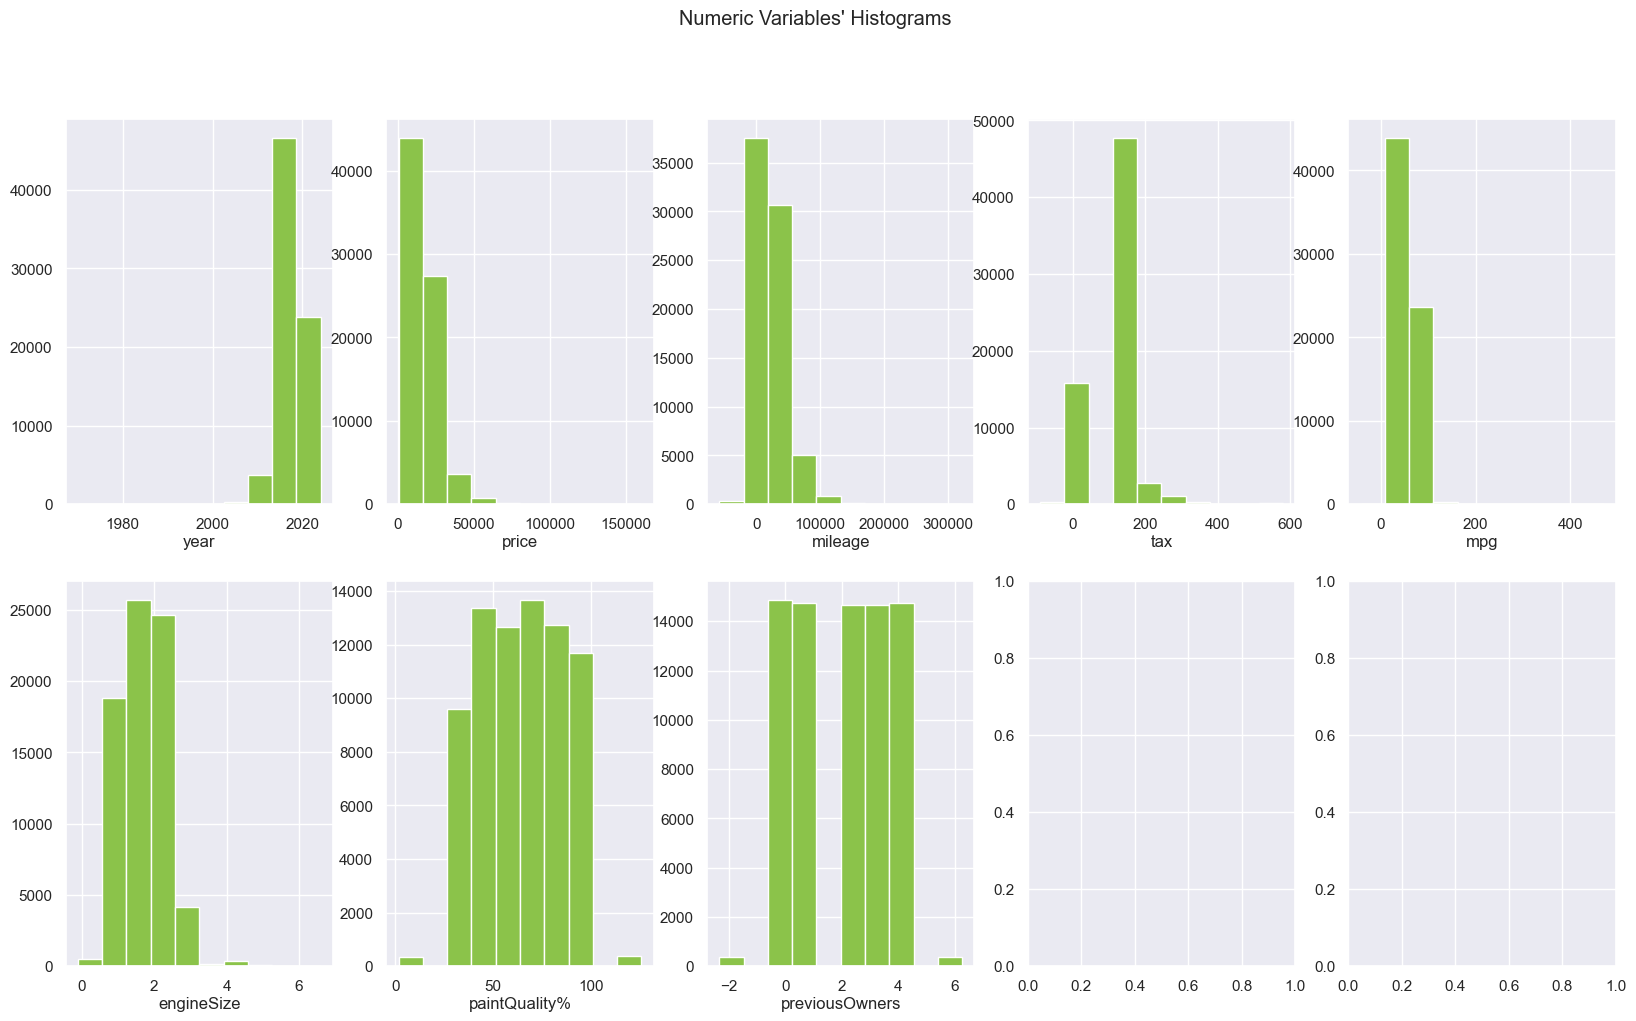

In [19]:
#Plot Numeric Variables' Histograms 

sns.set() 
sp_rows = 2
sp_cols = 5



fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(cars[feat], color='#8bc34a')
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    os.makedirs(os.path.join('..', 'figures', 'eda'))
    
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()

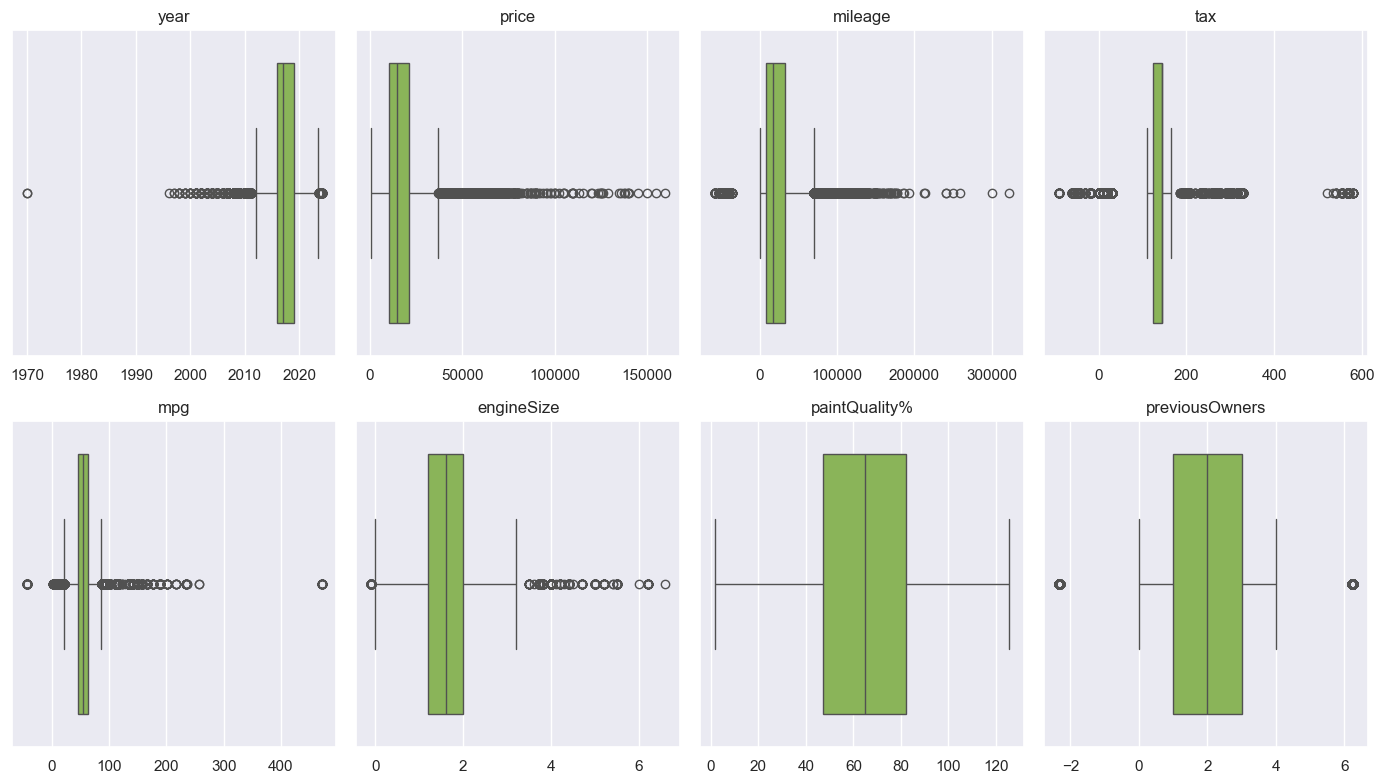

In [20]:
#Set up the figure size
plt.figure(figsize=(14, 8))

#Create one boxplot per variable
for i, col in enumerate(metric_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=cars[col], color='#8bc34a')
    plt.title(col)
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

Most num features are skewed, and most num features have outliers, we should apply transformations and treat them later on.


<Axes: >

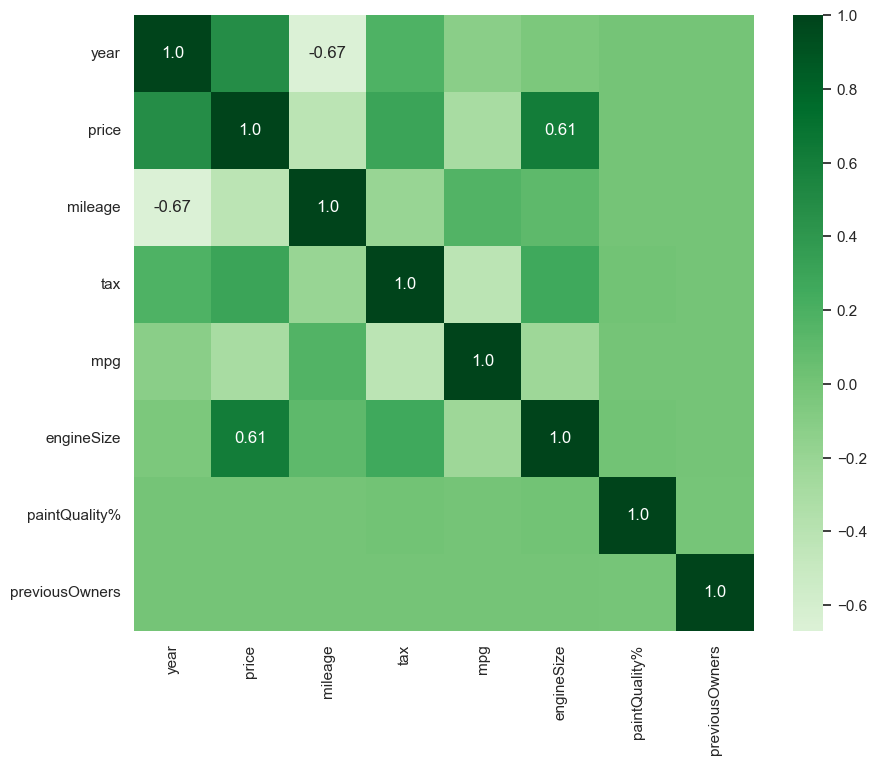

In [21]:
corr= cars[metric_features].corr(method="pearson")
corr= corr.round(2)


mask_annot = np.absolute(corr.values) >= 0.5

annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

fig = plt.figure(figsize=(10, 8))

sns.heatmap(data=corr, annot=annot, fmt="", center=0,cmap='Greens')

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

Not a lot of correlated relationships between features.


<span style="color:#8bc34a;">Categorical Features - Clean and standardize categorical variables</span>

In [63]:
cars['brand'].unique()

array(['VW', 'Toyota', 'Audi', 'Ford', 'BMW', 'Skoda', 'Opel', 'Mercedes',
       'FOR', 'mercedes', 'Hyundai', 'w', 'ord', 'MW', 'bmw', nan,
       'yundai', 'BM', 'Toyot', 'udi', 'Ope', 'AUDI', 'V', 'opel', 'pel',
       'For', 'pe', 'Mercede', 'audi', 'MERCEDES', 'OPEL', 'koda', 'FORD',
       'Hyunda', 'W', 'Aud', 'vw', 'hyundai', 'skoda', 'ford', 'TOYOTA',
       'ercedes', 'oyota', 'toyota', 'SKODA', 'Skod', 'HYUNDAI', 'kod',
       'v', 'for', 'SKOD', 'aud', 'KODA', 'PEL', 'yunda', 'or', 'UDI',
       'OYOTA', 'HYUNDA', 'mw', 'OPE', 'mercede', 'ERCEDES', 'ercede',
       'TOYOT', 'MERCEDE', 'ORD', 'ud', 'ope', 'AUD', 'hyunda', 'skod',
       'toyot'], dtype=object)

In [64]:
# Convert all to lowercase and strip spaces
cars['brand'] = cars['brand'].str.lower().str.strip()


# Define mapping: wrong spellings → correct brand names
brand_map = {
    # Volkswagen
    'vw': 'Volkswagen', 'v': 'Volkswagen', 'w': 'Volkswagen',
    
    # Toyota
    'toyot': 'Toyota', 'oyota': 'Toyota', 'toyota': 'Toyota', 'oyot': 'Toyota', 'toyo': 'Toyota',
    
    # Ford
    'for': 'Ford', 'ord': 'Ford', 'ford': 'Ford', 'fro': 'Ford', 'or': 'Ford',
    
    # Audi
    'aud': 'Audi', 'audi': 'Audi', 'udi': 'Audi', 'audii': 'Audi', 'ud': 'Audi',
    
    # BMW
    'bm': 'BMW', 'mw': 'BMW', 'bmw': 'BMW', 'bw': 'BMW',
    
    # Mercedes
    'mercede': 'Mercedes', 'mercedes': 'Mercedes', 'ercedes': 'Mercedes', 'erce': 'Mercedes',
    'erc': 'Mercedes', 'ercee': 'Mercedes', 'ercede': 'Mercedes',
    
    # Hyundai
    'hyundai': 'Hyundai', 'hyunda': 'Hyundai', 'yundai': 'Hyundai', 'yunda': 'Hyundai',
    
    # Opel
    'opel': 'Opel', 'ope': 'Opel', 'pel': 'Opel', 'pe': 'Opel',
    
    # Skoda
    'skoda': 'Skoda', 'skod': 'Skoda', 'koda': 'Skoda', 'kod': 'Skoda',

    # NaN (optional placeholder for missing values)
    'nan': 'Unknown'
}

# Clean data
cars['brand'] = cars['brand'].replace(brand_map)
cars['brand'] = cars['brand'].str.title() #first letter upercase
print(sorted(cars['brand'].dropna().unique()))



['Audi', 'Bmw', 'Ford', 'Hyundai', 'Mercedes', 'Opel', 'Skoda', 'Toyota', 'Volkswagen']


In [65]:
"""For the test dataset as well:"""
# Convert all to lowercase and strip spaces
cars_test['brand'] = cars_test['brand'].str.lower().str.strip()
# Clean data
cars_test['brand'] = cars_test['brand'].replace(brand_map)
cars_test['brand'] = cars_test['brand'].str.title() #first letter upercase

In [66]:
#Normalize text (lowercase + strip)
cars['model'] = cars['model'].str.lower().str.strip()

#Define mapping of wrong or partial spellings → correct names
model_map = {
    # Ford
    'focus': 'Focus', 'focu': 'Focus',
    'fiesta': 'Fiesta', 'fiest': 'Fiesta',
    'mondeo': 'Mondeo', 'monde': 'Mondeo',
    'kuga': 'Kuga', 'kug': 'Kuga',
    'ka': 'Ka', 'ka+': 'Ka+',
    'ecosport': 'EcoSport', 'ecospor': 'EcoSport',
    'b-max': 'B-MAX', 'b-ma': 'B-MAX',
    'c-max': 'C-MAX', 'c-ma': 'C-MAX',
    's-max': 'S-MAX', 's-ma': 'S-MAX',
    'tourneo connect': 'Tourneo Connect', 'tourneo custom': 'Tourneo Custom',
    'grand c-max': 'Grand C-MAX', 'grand tourneo connect': 'Grand Tourneo Connect',

    # VW
    'golf': 'Golf', 'golf s': 'Golf', 'gol': 'Golf',
    'passat': 'Passat', 'passa': 'Passat',
    'tiguan': 'Tiguan', 'tigua': 'Tiguan',
    'touareg': 'Touareg', 'touare': 'Touareg',
    't-roc': 'T-Roc', 't-ro': 'T-Roc',
    't-cross': 'T-Cross', 't-cros': 'T-Cross',
    'touran': 'Touran', 'toura': 'Touran',
    'caddy': 'Caddy', 'caddy maxi': 'Caddy Maxi', 'caddy life': 'Caddy Life',
    'arteon': 'Arteon', 'arteo': 'Arteon',
    'sharan': 'Sharan', 'shara': 'Sharan',
    'amarok': 'Amarok',
    'scirocco': 'Scirocco', 'scirocc': 'Scirocco',
    'beetle': 'Beetle', 'beetl': 'Beetle',
    'caravelle': 'Caravelle', 'caravell': 'Caravelle',
    'up': 'Up',

    # BMW
    '1 series': '1 Series', '1 serie': '1 Series',
    '2 series': '2 Series', '2 serie': '2 Series',
    '3 series': '3 Series', '3 serie': '3 Series',
    '4 series': '4 Series', '4 serie': '4 Series',
    '5 series': '5 Series', '5 serie': '5 Series',
    '6 series': '6 Series', '6 serie': '6 Series',
    '7 series': '7 Series', '7 serie': '7 Series',
    '8 series': '8 Series', '8 serie': '8 Series',
    'm3': 'M3', 'm4': 'M4', 'm5': 'M5', 'm6': 'M6',
    'z3': 'Z3', 'z4': 'Z4',
    'x1': 'X1', 'x2': 'X2', 'x3': 'X3', 'x4': 'X4', 'x5': 'X5', 'x6': 'X6', 'x7': 'X7',

    # Mercedes
    'a class': 'A Class', 'a clas': 'A Class',
    'b class': 'B Class', 'b clas': 'B Class',
    'c class': 'C Class', 'c clas': 'C Class',
    'e class': 'E Class', 'e clas': 'E Class',
    's class': 'S Class', 's clas': 'S Class',
    'glc class': 'GLC Class', 'glc clas': 'GLC Class',
    'gle class': 'GLE Class', 'gle clas': 'GLE Class',
    'gla class': 'GLA Class', 'gla clas': 'GLA Class',
    'gl class': 'GL Class', 'glb class': 'GLB Class',
    'cls class': 'CLS Class', 'cls clas': 'CLS Class',
    'cla class': 'CLA Class', 'cla clas': 'CLA Class',
    'sl class': 'SL Class', 'sl clas': 'SL Class',
    'slk': 'SLK', 'clk': 'CLK', 'cl class': 'CL Class', 'cl clas': 'CL Class',
    'v class': 'V Class', 'v clas': 'V Class',
    'x-class': 'X-Class', 'x-clas': 'X-Class',

    # Audi
    'a1': 'A1', 'a2': 'A2', 'a3': 'A3', 'a4': 'A4', 'a5': 'A5',
    'a6': 'A6', 'a7': 'A7', 'a8': 'A8',
    'q2': 'Q2', 'q3': 'Q3', 'q5': 'Q5', 'q7': 'Q7', 'q8': 'Q8',
    'tt': 'TT', 's3': 'S3', 's4': 'S4', 'rs3': 'RS3', 'rs4': 'RS4', 'rs5': 'RS5', 'rs6': 'RS6', 'sq5': 'SQ5', 'sq7': 'SQ7',
    'r8': 'R8',

    # Toyota
    'yaris': 'Yaris', 'yari': 'Yaris',
    'aygo': 'Aygo', 'ayg': 'Aygo',
    'corolla': 'Corolla', 'coroll': 'Corolla',
    'rav4': 'RAV4', 'rav': 'RAV4',
    'c-hr': 'C-HR', 'c-h': 'C-HR',
    'auris': 'Auris', 'auri': 'Auris',
    'avensis': 'Avensis', 'avensi': 'Avensis',
    'prius': 'Prius',
    'camry': 'Camry',
    'verso': 'Verso', 'vers': 'Verso', 'proace verso': 'Proace Verso', 'verso-s': 'Verso-S',
    'supra': 'Supra',
    'land cruiser': 'Land Cruiser', 'land cruise': 'Land Cruiser', 'urban cruiser': 'Urban Cruiser',

    # Hyundai
    'i10': 'I10', 'i20': 'I20', 'i30': 'I30', 'i40': 'I40', 'i80': 'I80', 'i800': 'I800',
    'ioniq': 'Ioniq', 'ioni': 'Ioniq',
    'ix20': 'IX20', 'ix35': 'IX35', 'ix2': 'IX2',
    'kona': 'Kona', 'kon': 'Kona',
    'tucson': 'Tucson', 'tucso': 'Tucson', 'tucs': 'Tucson',
    'santa fe': 'Santa Fe', 'santa f': 'Santa Fe',

    # Opel
    'astra': 'Astra', 'astr': 'Astra',
    'corsa': 'Corsa', 'cors': 'Corsa',
    'insignia': 'Insignia', 'insigni': 'Insignia',
    'mokka': 'Mokka', 'mokka x': 'Mokka X', 'mokk': 'Mokka', 'mokka ': 'Mokka',
    'zafira': 'Zafira', 'zafir': 'Zafira', 'zafira tourer': 'Zafira Tourer',
    'meriva': 'Meriva', 'meriv': 'Meriva',
    'antara': 'Antara',
    'vectra': 'Vectra',
    'grandland x': 'Grandland X', 'grandland': 'Grandland X',
    'crossland x': 'Crossland X', 'crossland': 'Crossland X',
    'combo life': 'Combo Life', 'combo lif': 'Combo Life',
    'vivaro': 'Vivaro',
    'adam': 'Adam',
    'agila': 'Agila',
    'gtc': 'GTC', 'gt86': 'GT86', 'tigra': 'Tigra', 'ampera': 'Ampera', 'cascada': 'Cascada',

    # Skoda
    'octavia': 'Octavia', 'octavi': 'Octavia',
    'fabia': 'Fabia', 'fabi': 'Fabia',
    'superb': 'Superb', 'super': 'Superb',
    'karoq': 'Karoq', 'karo': 'Karoq',
    'kodiaq': 'Kodiaq', 'kodi': 'Kodiaq',
    'kamiq': 'Kamiq', 'kami': 'Kamiq',
    'scala': 'Scala', 'scal': 'Scala',
    'roomster': 'Roomster', 'roomste': 'Roomster',
    'yeti': 'Yeti', 'yeti outdoor': 'Yeti Outdoor', 'yeti outdoo': 'Yeti Outdoor',

    # Miscellaneous
    'mustang': 'Mustang',
    'edge': 'Edge',
    'fusion': 'Fusion',
    'puma': 'Puma',
    'hilux': 'Hilux', 'hilu': 'Hilux',
    'fox': 'Fox',
    'shuttle': 'Shuttle',
    'camry': 'Camry',
    'i3': 'I3', 'i8': 'I8',
}

# Replace using the dictionary
cars['model'] = cars['model'].replace(model_map)

#Capitalize properly for display
cars['model'] = cars['model'].str.title()

#Verify unique clean values
print(sorted(cars['model'].dropna().unique()))


['1 Series', '2 Series', '200', '220', '230', '3 Series', '4 Series', '5 Series', '6 Series', '7 Series', '8 Series', 'A', 'A Class', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'Accent', 'Ada', 'Adam', 'Agila', 'Amaro', 'Amarok', 'Ampera', 'Antara', 'Arteon', 'Astra', 'Auris', 'Avensis', 'Aygo', 'B Class', 'B-Max', 'Beetle', 'C Class', 'C-Hr', 'C-Max', 'Caddy', 'Caddy Life', 'Caddy Maxi', 'Caddy Maxi Lif', 'Caddy Maxi Life', 'California', 'Camry', 'Caravelle', 'Cascada', 'Cc', 'Citig', 'Citigo', 'Cl Class', 'Cla Class', 'Clc Class', 'Clk', 'Cls Class', 'Combo Life', 'Corolla', 'Corsa', 'Crossland X', 'E Class', 'Ecosport', 'Edg', 'Edge', 'Eos', 'Escort', 'Fabia', 'Fiesta', 'Focus', 'Fox', 'Fusion', 'G Class', 'Galax', 'Galaxy', 'Getz', 'Gl Class', 'Gla Class', 'Glb Class', 'Glc Class', 'Gle Class', 'Gls Clas', 'Gls Class', 'Golf', 'Golf Sv', 'Grand C-Ma', 'Grand C-Max', 'Grand Tourneo Connec', 'Grand Tourneo Connect', 'Grandland X', 'Gt86', 'Gtc', 'Hilux', 'I', 'I1', 'I10', 'I2', 

In [67]:
"""For the test dataset as well:"""
#Convert all to lowercase and strip spaces
cars_test['model'] = cars_test['model'].str.lower().str.strip()
#Clean data
cars_test['model'] = cars_test['model'].replace(model_map)
cars_test['model'] = cars_test['model'].str.title() #first letter upercase

In [68]:
cars['transmission'].unique()

array(['Semi-Auto', 'Manual', 'anual', 'Semi-Aut', 'Automatic', 'manual',
       nan, 'unknown', 'Manua', 'AUTOMATIC', 'MANUAL', 'semi-auto',
       ' Manual ', 'automatic', 'emi-Auto', 'SEMI-AUTO', 'SEMI-AUT',
       'Automati', 'ANUAL', 'utomatic', 'unknow', 'EMI-AUTO', 'manua',
       'anua', 'emi-Aut', 'MANUA', 'emi-auto', 'UTOMATIC', ' manual ',
       ' MANUAL ', 'UNKNOWN', 'nknown', 'automati', 'Other', 'semi-aut',
       ' Manual', 'AUTOMATI', 'utomati', 'Manual ', 'manual ', 'nknow'],
      dtype=object)

In [69]:
#Normalize text
cars['transmission'] = cars['transmission'].str.lower().str.strip()

#Define mapping of typos → correct labels
transmission_map = {
    #Manual
    'manual': 'Manual', 'manua': 'Manual', 'anual': 'Manual', 'anua': 'Manual',
    
    #Automatic
    'automatic': 'Automatic', 'automati': 'Automatic', 'utomatic': 'Automatic', 'utomat': 'Automatic', 'utomati': 'Automatic',
    
    #Semi-Auto
    'semi-auto': 'Semi-Auto', 'semi-aut': 'Semi-Auto', 'emi-auto': 'Semi-Auto', 'emi-aut': 'Semi-Auto',
    
    #Unknown
    'unknown': 'Unknown', 'unknow': 'Unknown', 'nknown': 'Unknown', 'nknow': 'Unknown', 'nknown': 'Unknown', 'nknown': 'Unknown',
    'nknown': 'Unknown', 'other': 'Unknown'
}

#Replace values
cars['transmission'] = cars['transmission'].replace(transmission_map)

#Convert to title case for presentation
cars['transmission'] = cars['transmission'].str.title()

#Double-check result
print(sorted(cars['transmission'].dropna().unique()))


['Automatic', 'Manual', 'Semi-Auto', 'Unknown']


In [70]:
"""For the test dataset as well:"""
#Convert all to lowercase and strip spaces
cars_test['transmission'] = cars_test['transmission'].str.lower().str.strip()
#Clean data
cars_test['transmission'] = cars_test['transmission'].replace(transmission_map)
cars_test['transmission'] = cars_test['transmission'].str.title() #first letter upercase

In [71]:
cars['fuelType'].unique()

array(['Petrol', 'Diesel', 'etrol', 'Hybrid', 'diesel', 'iesel', nan,
       'petrol', 'PETROL', 'Diese', 'Petro', 'DIESEL', 'petro', 'HYBRID',
       'ybri', 'Other', 'DIESE', 'Hybri', 'ETROL', 'ybrid', 'PETRO',
       'hybrid', 'IESEL', 'Electric', 'ther', 'iese', 'etro', 'ETRO',
       'diese', 'Othe', 'YBRID', 'HYBRI', 'OTHER', 'other', 'IESE'],
      dtype=object)

In [72]:
#Normalize text
cars['fuelType'] = cars['fuelType'].str.lower().str.strip()

#Define mapping for misspellings → correct values
fuel_map = {
    #Petrol
    'petrol': 'Petrol', 'petro': 'Petrol', 'etrol': 'Petrol', 'etro': 'Petrol', 'etro': 'Petrol', 'etro': 'Petrol',
    
    #Diesel
    'diesel': 'Diesel', 'diese': 'Diesel', 'dies': 'Diesel', 'iesel': 'Diesel', 'iese': 'Diesel', 'iese': 'Diesel', 'iese': 'Diesel', 'iese': 'Diesel', 'dies': 'Diesel',
    
    #Hybrid
    'hybrid': 'Hybrid', 'hybri': 'Hybrid', 'ybri': 'Hybrid', 'ybrid': 'Hybrid', 'hybri': 'Hybrid',
    
    #Electric
    'electric': 'Electric',
    
    #Other / Unknown
    'other': 'Other', 'othe': 'Other', 'ther': 'Other'
}

#Apply replacements
cars['fuelType'] = cars['fuelType'].replace(fuel_map)

#Convert to title case for presentation
cars['fuelType'] = cars['fuelType'].str.title()

#Check cleaned unique values
print(sorted(cars['fuelType'].dropna().unique()))


['Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol']


In [73]:
"""For the test dataset as well:"""
#Convert all to lowercase and strip spaces
cars_test['fuelType'] = cars_test['fuelType'].str.lower().str.strip()
#Clean data
cars_test['fuelType'] = cars_test['fuelType'].replace(fuel_map)
cars_test['fuelType'] = cars_test['fuelType'].str.title() #first letter upercase

<span style="color:#8bc34a;">Remove rows with missing 'year' values</span>

In [74]:
cars = cars.dropna(subset=['year'])
#for test dataset we will be filling the 'year' missing values with median and then return the int number
median_year_test = cars_test['year'].median()
cars_test['year'] = cars_test['year'].fillna(median_year_test)

<span style="color:#8bc34a;">Ensure numeric validity and correct data types</span>

In [75]:
# onvert negative values to positive (absolute value)
cars[metric_features] = cars[metric_features].abs()
cars['hasDamage'] = cars['hasDamage'].astype(bool)
cars['year'] = cars['year'].astype(int)

#Now for the test dataset
cars_test[metric_features_test] = cars_test[metric_features_test].abs()
cars_test['hasDamage'] = cars_test['hasDamage'].astype(bool)
cars_test['year'] = cars_test['year'].astype(int)

In [35]:
cars.dtypes

brand              object
model              object
year                int64
price               int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage            bool
dtype: object

### **<span style="color:#689f38;">Analysing Relationships Between Features</span>**


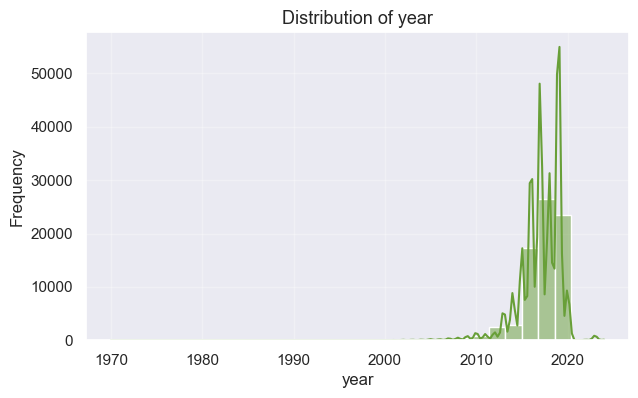

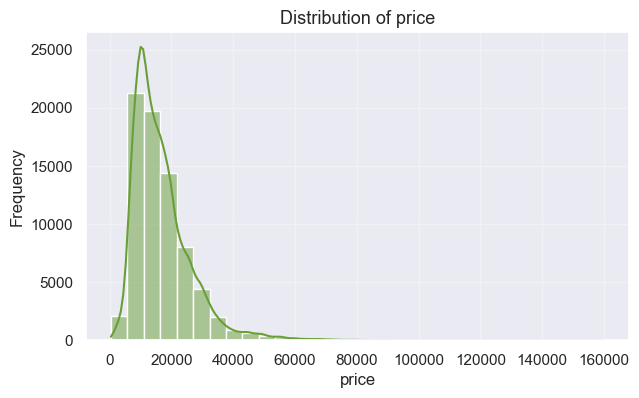

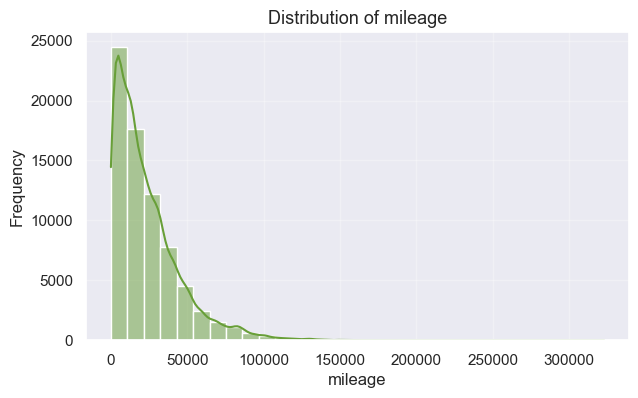

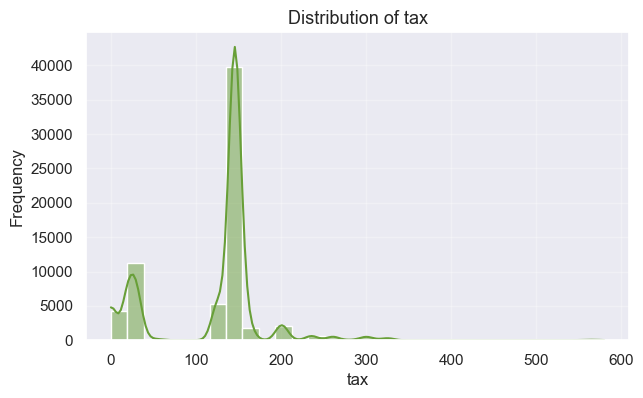

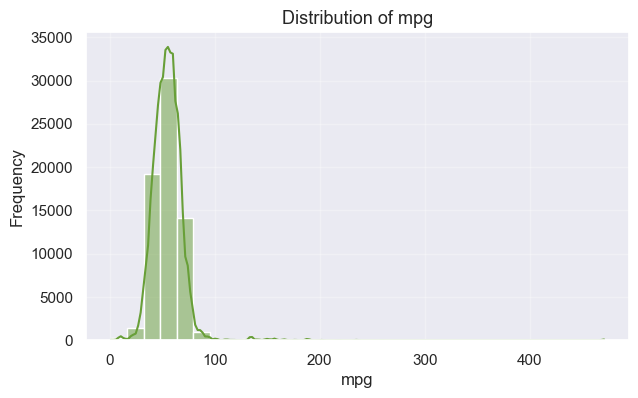

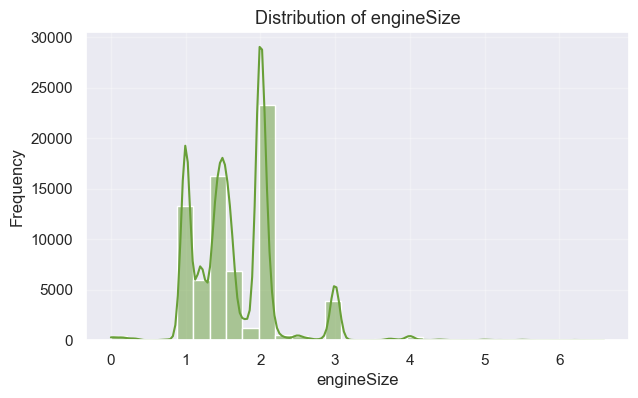

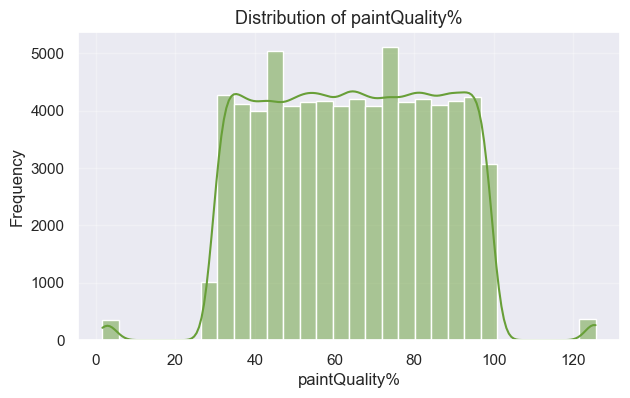

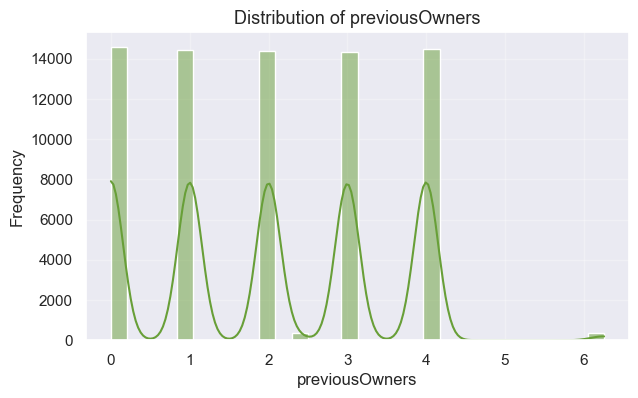

In [36]:
for col in cars[metric_features]:

    plt.figure(figsize=(7,4))
    sns.histplot(cars[col], bins=30, kde=True, color="#689f38")
    plt.title(f"Distribution of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.show()

/var/folders/0x/9kjdb9r93sdfs31c0ztntxyc0000gp/T/ipykernel_74640/3424058398.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=cars[non_metric_features], order=order, palette="Greens_r")


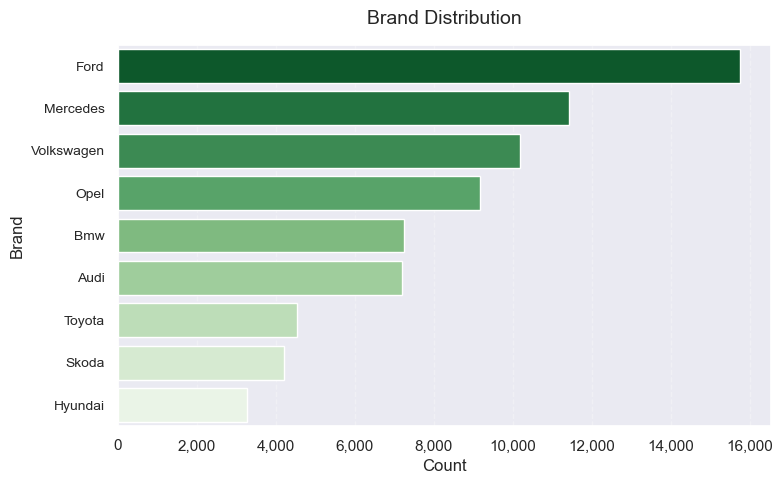

/var/folders/0x/9kjdb9r93sdfs31c0ztntxyc0000gp/T/ipykernel_74640/3424058398.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=cars[non_metric_features], order=order, palette="Greens_r")


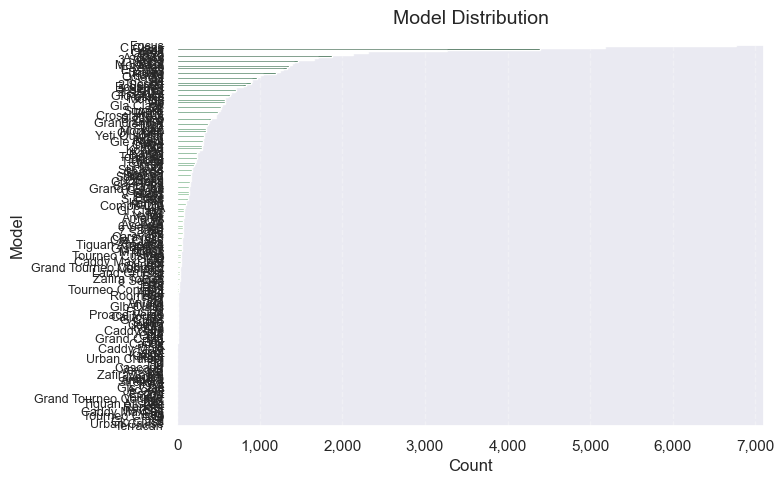

/var/folders/0x/9kjdb9r93sdfs31c0ztntxyc0000gp/T/ipykernel_74640/3424058398.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=cars[non_metric_features], order=order, palette="Greens_r")


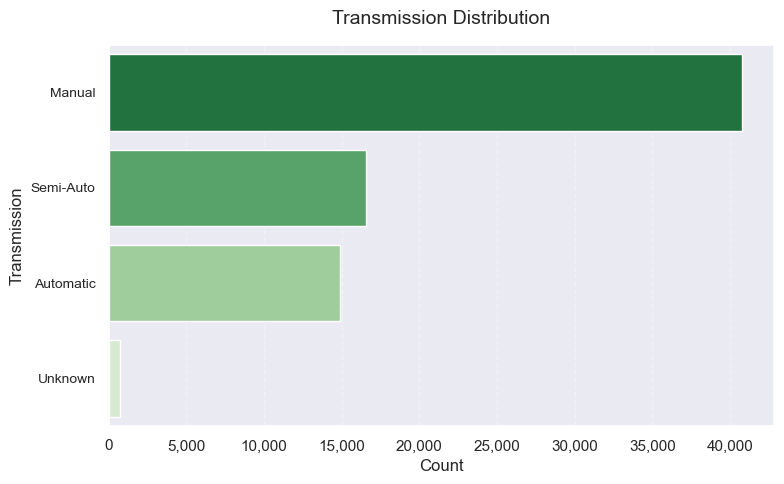

/var/folders/0x/9kjdb9r93sdfs31c0ztntxyc0000gp/T/ipykernel_74640/3424058398.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=cars[non_metric_features], order=order, palette="Greens_r")


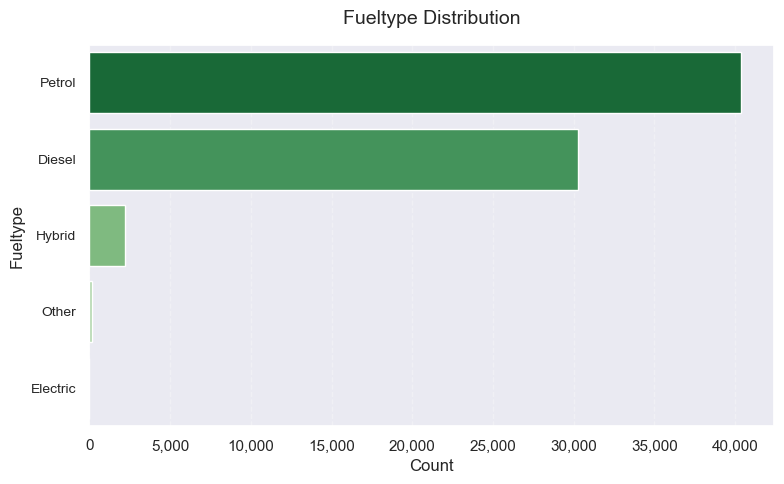

/var/folders/0x/9kjdb9r93sdfs31c0ztntxyc0000gp/T/ipykernel_74640/3424058398.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=cars[non_metric_features], order=order, palette="Greens_r")


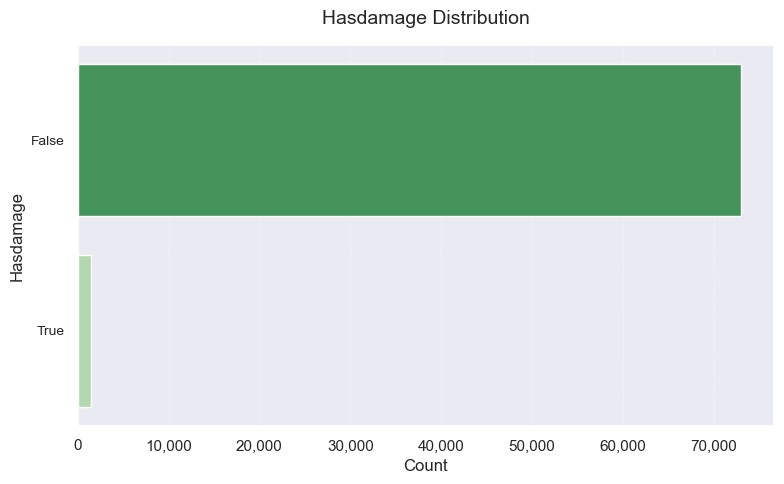

In [37]:

for col in cars[non_metric_features]:

    plt.figure(figsize=(8, 5))
    order = cars[col].value_counts().index
    ax = sns.countplot(y=col, data=cars[non_metric_features], order=order, palette="Greens_r")

    # Title and labels
    plt.title(f"{col.replace('_', ' ').title()} Distribution", fontsize=14, pad=15)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel(col.replace('_', ' ').title(), fontsize=12)

    # Apply thousand separator and grid
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    plt.grid(alpha=0.3, axis="x", linestyle="--")

    # Rotate labels for long names
    if cars[col].nunique() > 10:
        plt.yticks(fontsize=9)
    else:
        plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">


**1. HasDamage Distribution**<br>
This chart shows the distribution of the 'HasDamage' feature, indicating whether cars have been reported as damaged ('True') or not ('False').
The majority of cars in the dataset **do not have damage**. The dataset is **imbalanced** with a **highly skewed distribution** toward cars without damage, this might affect model performance.


**2. Fuel Type Distribution**<br>
This chart visualizes the distribution of car fuel types in the dataset.<br>
- **Petrol** is the most common fuel type.
- **Diesel** follows as the second most common fuel type, with a smaller proportion.
- **Hybrid**, **Other**, and **Electric** fuel types make up a **very small fraction** of the dataset.


**3. Transmission Distribution**<br>
This chart shows the distribution of car 'Transmission' types in the dataset.<br>
- **Manual** transmission cars are the most common.
- **Semi-Auto**, **Unknown**  and **Automatic** transmissions have a smaller portion of the dataset.


**4. Model Distribution** <br>
This chart illustrates the distribution of various car **models** in the dataset. <br>
The distribution of **models is extremely skewed**, we should have that in consideration when scaling.


**5. Brand Distribution**<br>
This chart shows the distribution of car **brands** in the dataset. **Ford** is the most frequent car brand, followed by **Mercedes**, **Volkswagen**.<br>
The **minority brands** could be **under-represented**, which might affect the model's ability to predict prices for these brands. 


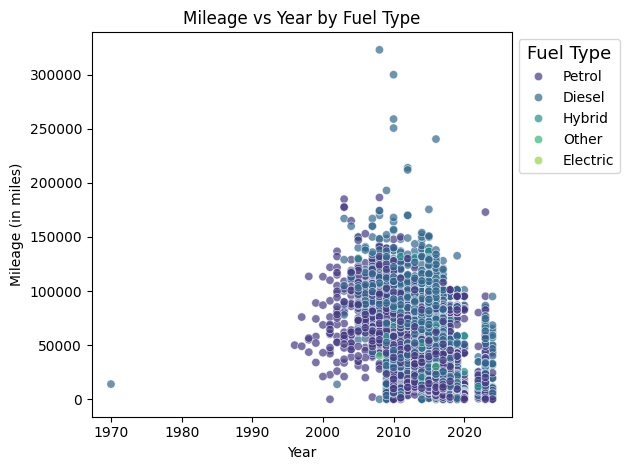

In [23]:
# Create scatter plot with hue for 'fuelType'
cars_num = cars[metric_features]
cars_cat = cars[non_metric_features]
sns.scatterplot(x=cars_num['year'], y=cars_num['mileage'], hue=cars_cat['fuelType'], palette='viridis', alpha=0.7)

# Set the title and labels
plt.title('Mileage vs Year by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Mileage (in miles)')

# Customize the legend to be outside the plot
plt.legend(title='Fuel Type', title_fontsize='13', fontsize='10', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust plot size to accommodate the legend outside
plt.tight_layout()

# Show the plot
plt.show()


<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">
<strong>Mileage vs Year by Fuel Type</strong>


- **Petrol and Diesel**: Most cars are from the **2010s** (but we know that is wrong since the data is from 2020 so we are going to fix that later on), with mileage ranging from **50,000 to 200,000 miles**. Diesel cars tend to have **slightly higher mileage**. 
- **Hybrid Cars**: Predominantly from the **2010s**, with **lower mileage**, likely due to their recent popularity.
- **Outliers**: One car has **extremely high mileage** (~350,000 miles), likely a commercial vehicle.


In Conclusion, **Older cars** have **higher mileage**, while **newer cars** (especially **Hybrid** and **Electric**) tend to have **lower mileage**.



# **<span style="color:#689f38;">Data Preprocessing & Transformations</span>**


### **<span style="color:#689f38;"> Splitting Data</span>**


In [204]:
X = cars.drop(columns=['price'])
y = cars['price']

In [205]:
#Split the data: 70% for training, 30% for validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.3,        #30% for validation
    random_state=0,      #ensures reproducibility
    stratify=None         #not needed here since target is continuous
)

In [206]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

#Repeat for Validation

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

#Repeat for Test
cars_test_num = cars_test.select_dtypes(include=np.number).set_index(cars_test.index)
cars_test_cat = cars_test.select_dtypes(exclude=np.number).set_index(cars_test.index)


### **<span style="color:#689f38;"> Handling Missing Values</span>**


**<span style="color:#8bc34a;">Fill missing numeric values in training set with median and mode</span>**

In [207]:
#Fill all other numeric columns with the median
#List the other columns (excluding 'tax' and 'mpg' because will be filled using KNN)
col_KNN = ['tax', 'mpg']
columns_to_fill = [col for col in X_train_num.columns if col not in col_KNN]  # Exclude KNN columns

#Loop through all the remaining columns and fill NaN values with the median
for column in columns_to_fill:
    median_to_fill = X_train_num[column].median()  # Calculate the median of the training set
    median_test = cars_test_num[column].median()  # Calculate the median of the test set
    
    #Fill missing values in training, validation, and test datasets with their respective medians
    X_train_num[column] = X_train_num[column].fillna(median_to_fill)
    X_val_num[column] = X_val_num[column].fillna(median_to_fill)
    cars_test_num[column] = cars_test_num[column].fillna(median_test)


<span style="color:#8bc34a;">Adjusting Data Types after filling the missing values</span>

In [208]:
X_train_num['previousOwners'] = X_train_num['previousOwners'].astype('int64')
X_val_num['previousOwners'] = X_val_num['previousOwners'].astype('int64')
cars_test_num['previousOwners'] =cars_test_num['previousOwners'].astype('int64')

**<span style="color:#8bc34a;">Fill missing categorical values in training set with mode</span>**

In [209]:
#Fill NaNs with mode for each categorical feature
for col in X_train_cat.columns:
    mode_value = X_train_cat[col].mode()[0]  #Get the most frequent value (mode)
    mode_value_test = cars_test_cat[col].mode()[0]
    X_train_cat[col] = X_train_cat[col].fillna(mode_value)  #Fill in the training data
    X_val_cat[col] = X_val_cat[col].fillna(mode_value)  #Fill in the validation data
    cars_test_cat[col] = cars_test_cat[col].fillna(mode_value_test)#Fill in the test data

In [210]:
X_train_cat['transmission'].unique()

array(['Manual', 'Semi-Auto', 'Automatic', 'Unknown'], dtype=object)

### **<span style="color:#689f38;">Scaling</span>**


<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

We chose to use StandardScaler instead of MinMaxScaler because we do not want to compress the data into a fixed range (such as [0, 1]) that MinMaxScaler would do. Compressing the data might distort the relationships between the features, especially when the data contains outliers.

Since we will be using linear regression (and other models) later, it's important to have features with standardized scales (mean = 0, standard deviation = 1), as this ensures that all features contribute equally to the model without being affected by differing scales. StandardScaler helps achieve this, making it a better choice for models like linear regression, which are sensitive to the scale of input features. 


**<span style="color:#8bc34a;">Standard Scaler</span>**

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

We are applying this method to be able to do the knn imputer 

In [211]:


def scale_data(X_train_num, X_val_num, cars_test_num):
    scaler = StandardScaler()
    
    # Fit only on TRAINING data
    X_train_num_scaled = scaler.fit_transform(X_train_num)
    
    # Transform all splits (using training parameters)
    X_val_num_scaled = scaler.transform(X_val_num)
    cars_test_num_scaled = scaler.transform(cars_test_num)
    
    # Convert back to DataFrame
    X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns).set_index(X_train.index)
    X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns=X_val_num.columns).set_index(X_val.index)
    cars_test_num_scaled = pd.DataFrame(cars_test_num_scaled, columns=cars_test_num.columns).set_index(cars_test.index)

    return X_train_num_scaled, X_val_num_scaled, cars_test_num_scaled, scaler

# Call the scaling function
X_train_num_scaled, X_val_num_scaled, cars_test_num_scaled, scaler = scale_data(X_train_num, X_val_num, cars_test_num)


**<span style="color:#8bc34a;">Fill missing numeric values in training set with KNN</span>**

In [212]:
col_KNN = ['tax', 'mpg']
#Fill 'tax' and 'mpg' using KNN
imputer = KNNImputer(n_neighbors=5)  # Initialize KNN Imputer with 5 neighbors

#Apply KNN for the selected columns
X_train_num_scaled[col_KNN] = imputer.fit_transform(X_train_num_scaled[col_KNN])  # Fit on training data
X_val_num_scaled[col_KNN] = imputer.transform(X_val_num_scaled[col_KNN])  # Apply transformation to validation data
cars_test_num_scaled[col_KNN] = imputer.transform(cars_test_num_scaled[col_KNN])  # Apply transformation to test data


In [85]:
X_train_num_scaled.head()

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners
carID,,,,,,,
16738,0.859679,-0.563080,1.320977e-16,1.527574e-16,-1.159840,-0.745311,-0.715158
2893,-0.036906,-0.579022,3.725720e-01,-2.380990e-01,-0.454336,0.936609,-1.417305
65373,-0.485199,0.448990,-1.554940e+00,5.558720e-01,-1.159840,0.167731,0.689137
9570,-0.485199,1.364004,6.417012e-02,3.015532e-01,0.603922,-0.601146,0.689137
6213,0.859679,-0.739191,3.108916e-01,-3.001280e-01,0.603922,0.600225,0.689137


**<span style="color:#8bc34a;">Inverse Scaling</span>**

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

We are reversing the scaling we did before because we want to deal with the outliers and we can't do that when the data is scaled. Also for feature creation to understand the data.

In [213]:
#unscaling
def inverse_scale_data(X_train_num_scaled, X_val_num_scaled, cars_test_num_scaled, scaler):
   
    X_train_unscaled = scaler.inverse_transform(X_train_num_scaled)
    X_val_unscaled = scaler.inverse_transform(X_val_num_scaled)
    cars_test_unscaled = scaler.inverse_transform(cars_test_num_scaled)

    
    X_train_num_df = pd.DataFrame(X_train_unscaled, columns=X_train_num.columns, index=X_train_num.index)
    X_val_num_df = pd.DataFrame(X_val_unscaled, columns=X_val_num.columns, index=X_val_num.index)
    cars_test_num_df = pd.DataFrame(cars_test_unscaled, columns=cars_test_num.columns, index=cars_test_num.index)
    
    return X_train_num_df, X_val_num_df, cars_test_num_df


In [214]:
X_train_num_df, X_val_num_df, cars_test_num_df = inverse_scale_data(
    X_train_num_scaled, X_val_num_scaled, cars_test_num_scaled, scaler
)


In [88]:
X_train_num_df.head()

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners
carID,,,,,,,
16738,2019.0,11291.0,120.838539,55.238512,1.0,49.0,1.0
2893,2017.0,10950.0,145.000000,51.400000,1.4,84.0,0.0
65373,2016.0,32939.0,20.000000,64.200000,1.0,68.0,3.0
9570,2016.0,52511.0,125.000000,60.100000,2.0,52.0,3.0
6213,2019.0,7524.0,141.000000,50.400000,2.0,77.0,3.0


### **<span style="color:#689f38;">Outliers Treatment</span>**


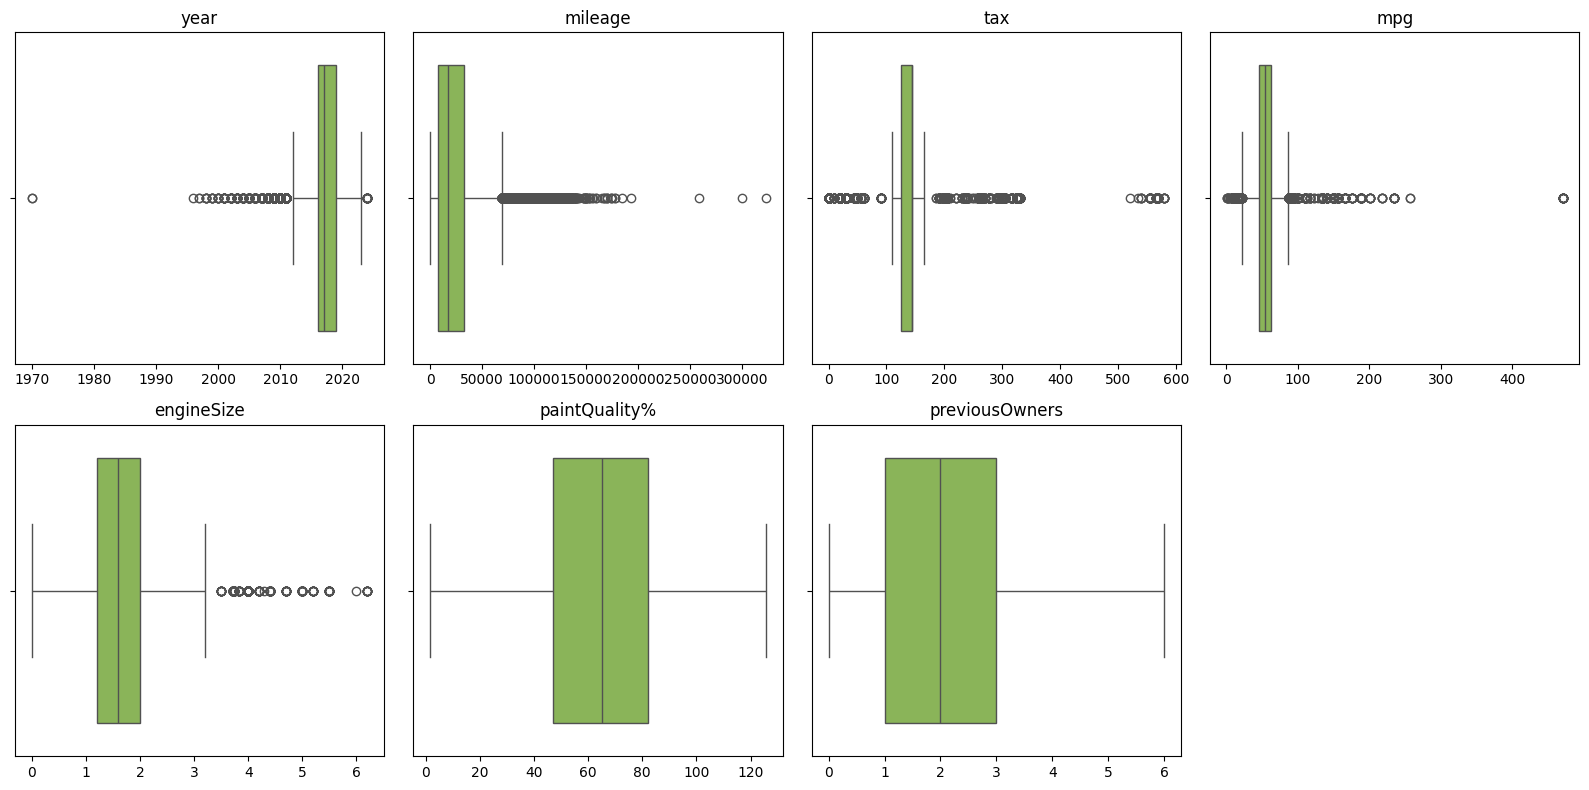

In [215]:


num_features = len(X_train_num_df.columns)
cols = 4   # number of subplots per row
rows = math.ceil(num_features / cols)

plt.figure(figsize=(16, 4 * rows))

for i, col in enumerate(X_train_num.columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=X_train_num[col], color='#8bc34a')
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()


<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

From the boxplots, we notice that most numerical features have outliers. We are dealing with them below.


<span style="color:#8bc34a;">IQR-based Winsorizing (clipping )</span>


<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

We are applying this method for the features that have the most visually outliers, using clipping as a choice because if we were to remove, for example, the outlier we would lose a lot of data. 

In [216]:
#Clipping function using IQR
def clip_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)  
    Q3 = df[feature].quantile(0.75)  
    IQR = Q3 - Q1 

    #Upper and lower limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df[feature] = df[feature].clip(lower=lower_limit, upper=upper_limit)

X_train_num = X_train_num.copy()
X_val_num = X_val_num.copy()
cars_test_num = cars_test_num.copy()


clip_outliers(X_train_num_df, 'tax')
clip_outliers(X_val_num_df, 'tax')
clip_outliers(cars_test_num_df, 'tax')

clip_outliers(X_train_num_df, 'mpg')
clip_outliers(X_val_num_df, 'mpg')
clip_outliers(cars_test_num_df, 'mpg')

clip_outliers(X_train_num_df, 'mileage')
clip_outliers(X_val_num_df, 'mileage')
clip_outliers(cars_test_num_df, 'mileage')

clip_outliers(X_train_num_df, 'engineSize')
clip_outliers(X_val_num_df, 'engineSize')
clip_outliers(cars_test_num_df, 'engineSize')



<span style="color:#8bc34a;">Winsorizing (Manually)</span>


<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

For the feature **year**, manually winsorizing was the best option, since after trying to use other methods, we came to the conclusion that a lot of data in validation set was lost. This could have happen because when dropping the rows with outliers and outside the year range from the train on the validation, the propotion of those values in the val set is bigger than in the train set (because of the splitting) so we would be dropping a lot of data.

In [217]:
print((X_train_num_df['year']<2020).value_counts())


year_w = X_train_num_df['year'].copy()
year_w.loc[year_w<2020] = 2020

X_train_num_df['year'] = year_w

year
True     49680
False     2454
Name: count, dtype: int64


In [194]:
print((X_val_num_df['year']<2020).value_counts())
year_w = X_val_num_df['year'].copy()
year_w.loc[year_w<2020] = 2020

X_val_num_df['year'] = year_w

year
True     21266
False     1078
Name: count, dtype: int64


In [195]:
print((cars_test_num_df['year']<2020).value_counts())

year_w = cars_test_num_df['year'].copy()
year_w.loc[year_w<2020] = 2020


cars_test_num_df['year'] = year_w

year
True     31051
False     1516
Name: count, dtype: int64


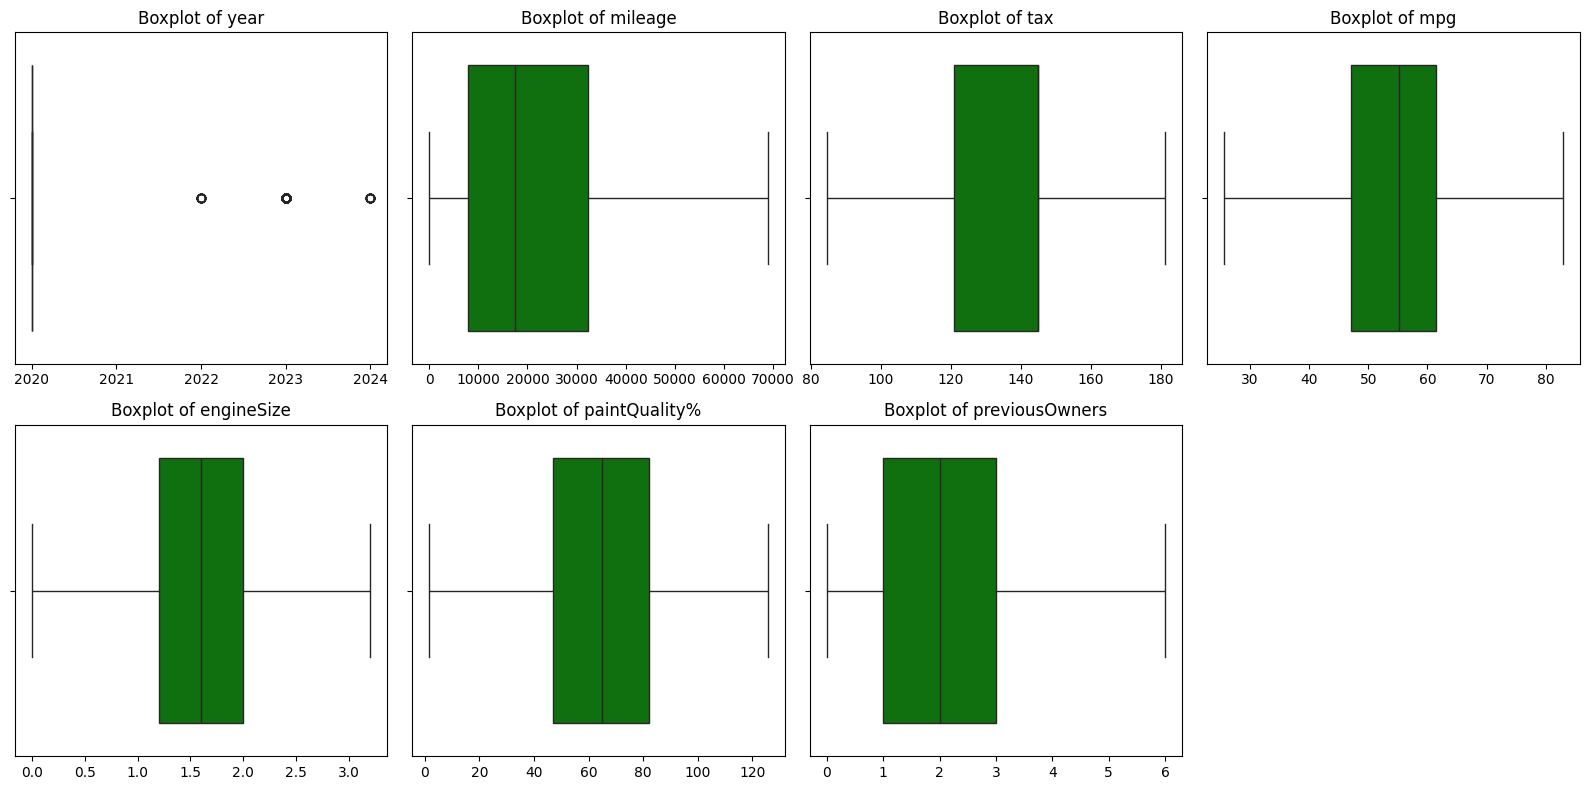

In [218]:

#Select only the numeric columns from the training dataset
num_cols = X_train_num_df.select_dtypes(include=['number']).columns


#Define the figure size for the boxplots
plt.figure(figsize=(16, 8))


for i, col in enumerate(num_cols, 1):
    plt.subplot(2, len(num_cols)//2 + 1, i)  
    sns.boxplot(x=X_train_num_df[col], color='green')  
    plt.title(f'Boxplot of {col}', fontsize=12)  
    plt.xlabel('')  
    plt.ylabel('')  


plt.tight_layout()
plt.show()


### **<span style="color:#689f38;">Feature Creation</span>**


<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">
Try to create new features before removing the irrelevant features <br>
Re-do feature selection <br>
Keep the relevant features.

In [219]:
def feature_engineering(df, current_year=2025):

    df_fe = df.copy()
    
    #Car age
    if 'year' in df_fe.columns:
        df_fe['car_age'] = current_year - df_fe['year']
        df_fe['car_age'] = df_fe['car_age'].clip(lower=0)  #avoid negative age
    
    #Mileage per year 
    if 'mileage' in df_fe.columns and 'car_age' in df_fe.columns:
        df_fe['mileage_per_year'] = df_fe['mileage'] / df_fe['car_age'].replace(0,1)
    
    return df_fe


In [220]:
#Apply feature engineering to training, validation, and test sets
X_train_num_df = feature_engineering(X_train_num_df)
X_val_num_df = feature_engineering(X_val_num_df)
cars_test_num_df = feature_engineering(cars_test_num_df)


In [45]:
X_train_num_df.head()

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,car_age,mileage_per_year
carID,,,,,,,,,
16738,2020.0,11291.0,120.838539,55.238512,1.0,49.0,1.0,5.0,2258.2
2893,2020.0,10950.0,145.000000,51.400000,1.4,84.0,0.0,5.0,2190.0
65373,2020.0,32939.0,84.596347,64.200000,1.0,68.0,3.0,5.0,6587.8
9570,2020.0,52511.0,125.000000,60.100000,2.0,52.0,3.0,5.0,10502.2
6213,2020.0,7524.0,141.000000,50.400000,2.0,77.0,3.0,5.0,1504.8


**<span style="color:#8bc34a;">Frequency and One Hot Encoding</span>**

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">
For Encoding we used two methods:<br>

- **Frequency Encoding** -> applied to **model_freq** and **brand_freq** because they have a lot of unique values, so doesn´t make sense to use OneHotEncoding, since this would create a lot of columns. However, it is in our knowledge, that this approach also has desavantages, for example, two features becoming one if they have the same frequency, that's why we only used on these two variables.
- **OneHotEncoding** -> applied to the rest of the categorical features, creating binary columns based on the categories present in the data.

In [221]:

def encode_categorical_features(X_train_cat, X_val_cat, cars_test_cat, categorical_cols, freq_columns):
    
    # Frequency Encoding for Training
    def frequency_encoding(df, freq_columns):
        df_encoded = df.copy()
        for col in freq_columns:
            df_encoded[f'{col}_freq'] = df[col].map(df[col].value_counts())
        return df_encoded

    # Apply Frequency Encoding to the training data
    X_train_cat_encoded = frequency_encoding(X_train_cat, freq_columns)

    # Frequency Encoding for Validation and Test (using frequencies from the training data)
    def encode_like_train(df, X_train_cat, freq_columns):
        df_encoded = df.copy()
        for col in freq_columns:
            df_encoded[f'{col}_freq'] = df[col].map(X_train_cat[col].value_counts())
            df_encoded[f'{col}_freq'].fillna(0, inplace=True)  # Replace unseen categories with 0
        return df_encoded

    # Apply Frequency Encoding to validation and test data using training data frequencies
    X_val_cat_encoded = encode_like_train(X_val_cat, X_train_cat, freq_columns)
    cars_test_cat_encoded = encode_like_train(cars_test_cat, X_train_cat, freq_columns)

    # One-Hot Encoding (fit on training, apply on validation/test)
    ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    encoded_array_train = ohe.fit_transform(X_train_cat[categorical_cols])
    encoded_array_val = ohe.transform(X_val_cat[categorical_cols])
    encoded_array_test = ohe.transform(cars_test_cat[categorical_cols])

    # Create DataFrames from encoded arrays and align indices
    encoded_cols = ohe.get_feature_names_out(categorical_cols)
    encoded_train_df = pd.DataFrame(encoded_array_train, columns=encoded_cols, index=X_train_cat.index)
    encoded_val_df = pd.DataFrame(encoded_array_val, columns=encoded_cols, index=X_val_cat.index)
    encoded_test_df = pd.DataFrame(encoded_array_test, columns=encoded_cols, index=cars_test_cat.index)

    # Combine Frequency and One-Hot Encoded Data
    X_train_cat_final = pd.concat([
        X_train_cat_encoded[[f'{col}_freq' for col in freq_columns]],  # Frequency encoded columns
        encoded_train_df
    ], axis=1)

    X_val_cat_final = pd.concat([
        X_val_cat_encoded[[f'{col}_freq' for col in freq_columns]],  # Frequency encoded columns
        encoded_val_df
    ], axis=1)

    cars_test_cat_final = pd.concat([
        cars_test_cat_encoded[[f'{col}_freq' for col in freq_columns]],  # Frequency encoded columns
        encoded_test_df
    ], axis=1)

    # Ensure Validation/Test Data Has the Same Columns as Training Data
    # Reindex validation and test sets to match the training columns
    X_val_cat_final = X_val_cat_final.reindex(columns=X_train_cat_final.columns, fill_value=0)
    cars_test_cat_final = cars_test_cat_final.reindex(columns=X_train_cat_final.columns, fill_value=0)

    return X_train_cat_final, X_val_cat_final, cars_test_cat_final


In [222]:
categorical_cols = ['transmission', 'fuelType', 'hasDamage']  
freq_columns = ['brand', 'model']  

X_train_cat_final, X_val_cat_final, cars_test_cat_final = encode_categorical_features(
    X_train_cat, X_val_cat, cars_test_cat, categorical_cols, freq_columns
)


In [99]:
X_train_cat_final.head()

,brand_freq,model_freq,transmission_Manual,transmission_Semi-Auto,transmission_Unknown,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,hasDamage_True
carID,,,,,,,,,,
16738,12129,5854,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2893,4960,665,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65373,7123,423,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9570,5052,480,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6213,4960,344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
#2 features that we encoded using the frequency encoder that need scaling
X_train_num_df = pd.concat([X_train_num_df, X_train_cat_final[['brand_freq', 'model_freq']]], axis=1)
X_val_num_df = pd.concat([X_val_num_df, X_val_cat_final[['brand_freq', 'model_freq']]], axis=1)
cars_test_num_df = pd.concat([cars_test_num_df, cars_test_cat_final [['brand_freq', 'model_freq']]], axis=1)

In [224]:
#Remove the frequency encoded columns from the categorical datasets
X_train_cat_final = X_train_cat_final.drop(columns=['brand_freq', 'model_freq'])
X_val_cat_final = X_val_cat_final.drop(columns=['brand_freq', 'model_freq'])
cars_test_cat_final = cars_test_cat_final.drop(columns=['brand_freq', 'model_freq'])

In [214]:
X_train_num_df.head()

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,car_age,mileage_per_year,brand_freq,model_freq
carID,,,,,,,,,,,
16738,2020.0,11291.0,120.838539,55.238512,1.0,49.0,1.0,5.0,2258.2,12129,5854
2893,2020.0,10950.0,145.000000,51.400000,1.4,84.0,0.0,5.0,2190.0,4960,665
65373,2020.0,32939.0,84.596347,64.200000,1.0,68.0,3.0,5.0,6587.8,7123,423
9570,2020.0,52511.0,125.000000,60.100000,2.0,52.0,3.0,5.0,10502.2,5052,480
6213,2020.0,7524.0,142.000000,50.400000,2.0,77.0,3.0,5.0,1504.8,4960,344


**<span style="color:#8bc34a;">Standard Scaling</span>**

In [225]:
X_train_num_final_scaled, X_val_num_final_scaled, cars_test_num_final_scaled, scaler_final = scale_data(
    X_train_num_df, X_val_num_df, cars_test_num_df
)

In [226]:
#concat all numeric and categorical features back together
X_train_final = pd.concat([X_train_num_final_scaled, X_train_cat_final], axis=1)
X_val_final = pd.concat([X_val_num_final_scaled, X_val_cat_final], axis=1)
cars_test_final = pd.concat([cars_test_num_final_scaled, cars_test_cat_final], axis=1)


In [217]:
X_train_final.head()

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,car_age,mileage_per_year,brand_freq,model_freq,transmission_Manual,transmission_Semi-Auto,transmission_Unknown,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,hasDamage_True
carID,,,,,,,,,,,,,,,,,,,
16738,-0.06673,-0.603362,-0.379962,0.047339,-1.218918,-0.745311,-0.715158,0.06673,-0.593655,1.561905,2.321816,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2893,-0.06673,-0.621796,0.491002,-0.296706,-0.467709,0.936609,-1.417305,0.06673,-0.611506,-0.724491,-0.550991,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65373,-0.06673,0.566923,-1.686409,0.850553,-1.218918,0.167731,0.689137,0.06673,0.539548,-0.034649,-0.684970,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9570,-0.06673,1.624980,-0.229951,0.483072,0.659105,-0.601146,0.689137,0.06673,1.564080,-0.695149,-0.653413,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6213,-0.06673,-0.807004,0.382859,-0.386335,0.659105,0.600225,0.689137,0.06673,-0.790846,-0.724491,-0.728707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **<span style="color:#689f38;">Modeling</span>**


### **<span style="color:#689f38;">Feature Selection</span>**


#### **<span style="color:#8bc34a;">Filter Methods</span>**

In [63]:
#Check for constant features
X_train_final.var() 

year                      1.000019
mileage                   1.000019
tax                       1.000019
mpg                       1.000019
engineSize                1.000019
paintQuality%             1.000019
previousOwners            1.000019
car_age                   1.000019
mileage_per_year          1.000019
brand_freq                1.000019
model_freq                1.000019
transmission_Manual       0.245292
transmission_Semi-Auto    0.172573
transmission_Unknown      0.009348
fuelType_Electric         0.000019
fuelType_Hybrid           0.028848
fuelType_Other            0.002277
fuelType_Petrol           0.245786
hasDamage_True            0.020066
dtype: float64

**<span style="color:#8bc34a;">Correlation Matrix</span>**

In [64]:
cor_spearman = X_train_final.corr(method ='spearman')
cor_spearman

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,car_age,mileage_per_year,brand_freq,model_freq,transmission_Manual,transmission_Semi-Auto,transmission_Unknown,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,hasDamage_True
year,1.000000,0.001307,-0.005413,-0.004478,-0.002840,-0.004368,-0.001311,-1.000000,0.056790,0.002950,0.003474,0.003325,-0.002274,-0.003639,-0.000295,-0.005082,-0.003225,0.004406,-0.001684
mileage,0.001307,1.000000,-0.264460,0.305615,0.096139,-0.001177,0.003449,-0.001307,0.998013,0.013973,0.027795,0.137985,-0.147890,-0.010926,-0.003198,0.019651,-0.002041,-0.189573,-0.003237
tax,-0.005413,-0.264460,1.000000,-0.539344,0.133020,0.009494,-0.000188,0.005413,-0.263986,-0.092636,-0.231552,-0.150962,0.130638,0.003965,-0.006252,-0.153549,-0.001990,0.131481,0.002926
mpg,-0.004478,0.305615,-0.539344,1.000000,-0.184936,-0.001472,0.002607,0.004478,0.304660,0.058883,0.205557,0.193163,-0.163245,-0.002810,0.005719,0.218954,0.023804,-0.324069,-0.005388
engineSize,-0.002840,0.096139,0.133020,-0.184936,1.000000,0.009814,0.002323,0.002840,0.095879,-0.075659,-0.226068,-0.503520,0.322979,-0.002754,0.003788,0.061663,-0.012587,-0.606174,0.002087
paintQuality%,-0.004368,-0.001177,0.009494,-0.001472,0.009814,1.000000,-0.003169,0.004368,-0.001323,-0.002818,-0.004732,-0.002332,0.000841,0.000507,-0.001312,-0.001340,0.001218,-0.002865,-0.001921
previousOwners,-0.001311,0.003449,-0.000188,0.002607,0.002323,-0.003169,1.000000,0.001311,0.003167,0.006188,-0.003467,0.002499,-0.004791,-0.003876,0.003144,0.004107,-0.006858,-0.002869,-0.000787
car_age,-1.000000,-0.001307,0.005413,0.004478,0.002840,0.004368,0.001311,1.000000,-0.056790,-0.002950,-0.003474,-0.003325,0.002274,0.003639,0.000295,0.005082,0.003225,-0.004406,0.001684
mileage_per_year,0.056790,0.998013,-0.263986,0.304660,0.095879,-0.001323,0.003167,-0.056790,1.000000,0.014289,0.027989,0.137723,-0.147442,-0.011276,-0.003209,0.019331,-0.002213,-0.188959,-0.003285
brand_freq,0.002950,0.013973,-0.092636,0.058883,-0.075659,-0.002818,0.006188,-0.002950,0.014289,1.000000,0.491287,0.089929,-0.027243,-0.001410,0.005889,-0.165914,-0.031902,0.011993,-0.000569


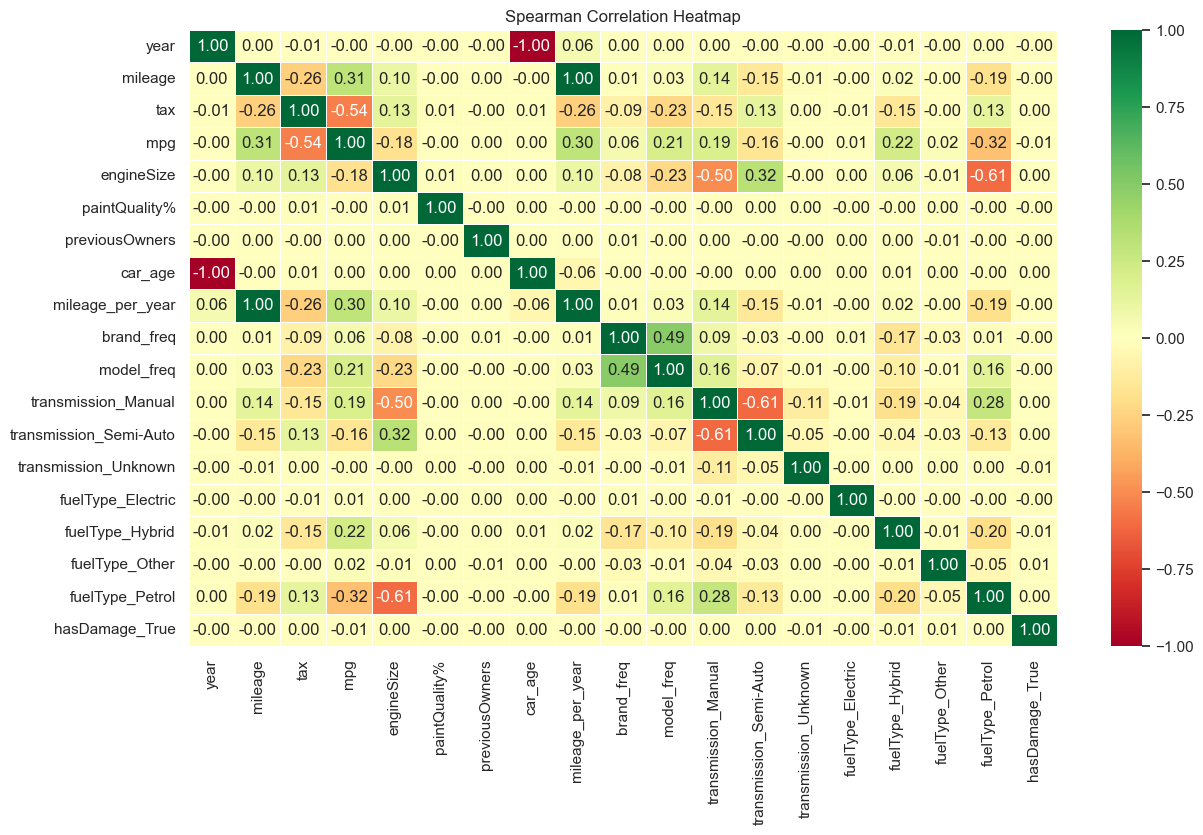

In [65]:
plt.figure(figsize=(14, 8))
sns.heatmap(cor_spearman, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Spearman Correlation Heatmap')
plt.show()


<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

By the correlation matrix we can see that the new features added have a strong correlation with previous features (mileage_ per_year, car_age), so for modeling improvement we are going to deleted them in feature selection part.

#### **<span style="color:#8bc34a;">Wrapper Methods</span>**

**<span style="color:#8bc34a;">RFE</span>**

In [ ]:
# number of features to try
nof_list = np.arange(1, len(X_train_final.columns) + 1)

best_score = -np.inf   # best validation R² so far
best_nof = 0           # best number of features

train_scores = []
val_scores = []
train_mae_list = []
val_mae_list = []

for n in nof_list:
    
    model = LinearRegression()
    rfe = RFE(estimator=model, n_features_to_select=n)
    
    # Fit RFE
    X_train_rfe = rfe.fit_transform(X_train_final, y_train)
    X_val_rfe = rfe.transform(X_val_final)
    
    # Fit model on selected features
    model.fit(X_train_rfe, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_rfe)
    y_val_pred = model.predict(X_val_rfe)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    
    # Save scores
    train_scores.append(train_r2)
    val_scores.append(val_r2)
    train_mae_list.append(train_mae)
    val_mae_list.append(val_mae)
    
    # Update best model based on validation R²
    if val_r2 > best_score:
        best_score = val_r2
        best_nof = n

print(f"Optimum number of features: {best_nof}")
print(f"Best validation R²: {best_score}")


Optimum number of features: 14
Best validation R²: 0.6545837068555009


In [74]:
# Fit RFE again using best number of features
best_rfe = RFE(estimator=LinearRegression(), n_features_to_select=best_nof)
best_rfe.fit(X_train_final, y_train)

selected_features = X_train_final.columns[best_rfe.support_]
print("Selected features:", list(selected_features))


Selected features: ['mileage', 'tax', 'mpg', 'engineSize', 'brand_freq', 'model_freq', 'transmission_Manual', 'transmission_Semi-Auto', 'transmission_Unknown', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol', 'hasDamage_True']


In [75]:
X_train_final.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'car_age', 'mileage_per_year', 'brand_freq',
       'model_freq', 'transmission_Manual', 'transmission_Semi-Auto',
       'transmission_Unknown', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol', 'hasDamage_True'],
      dtype='object')

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">
According to RFE the best number of features to select is 15. These features need to be removed:
<strong>year, paintQuality%, previousOwners, car_age, mileage _per_year</strong>



#### **<span style="color:#8bc34a;">Embedded Methods</span>**

In [76]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh", color = 'green')
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [77]:
reg = LassoCV()

In [78]:
reg.fit(X_train_final, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,None
,verbose,False
,n_jobs,None


In [79]:
coef = pd.Series(reg.coef_, index = X_train_final.columns)
coef.abs().sort_values(ascending = False)

engineSize                4391.255469
mileage                   4126.280193
transmission_Manual       3400.934303
fuelType_Hybrid           2256.589265
mpg                       1985.927934
transmission_Semi-Auto    1530.239283
fuelType_Petrol           1445.667445
transmission_Unknown       975.432373
tax                        469.392759
brand_freq                 315.955859
model_freq                  71.411856
paintQuality%               27.156194
previousOwners              19.566412
year                         0.739170
car_age                      0.099554
fuelType_Electric            0.000000
mileage_per_year             0.000000
fuelType_Other               0.000000
hasDamage_True               0.000000
dtype: float64

<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
    We can see that the variables <strong>mileage</strong> and <strong>engineSize</strong> have higher coefficents which means that they are important features. Although, we need to check multicollinearity between these features because some of them can be redundant.<br>
    Features like <strong>mileage _per_year</strong>, <strong>fuelType_Electric</strong>, <strong>fuelType_Other</strong> and <strong>hasDamage_True</strong> have lower coefficients, meaning they are less important so they don't contribute much to the prediction. We might consider dropping these features for model simplicity and efficiency, but we need to check later on.
</div>

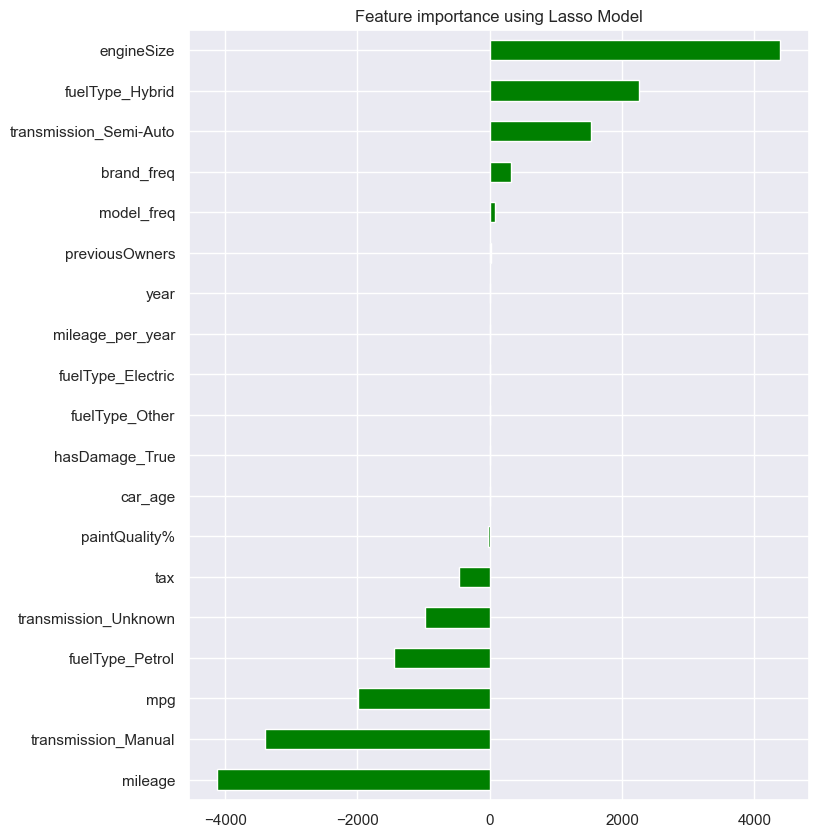

In [80]:

plot_importance(coef,'Lasso')

#### **<span style="color:#8bc34a;">Feature Selection</span>**

| Predictor | Lasso | RFE | Spearman | Conclusion |
| --- | --- | --- | --- | --- |
| engineSize| Keep | Keep | Keep| Include in the model
| year | Not Keep | Not Keep | Keep | Discard
| mileage | Keep | Keep | Not Keep | Include in the model
| mileage_per_year| Not Keep| Not Keep | Not Keep | Discard |
| mpg| Keep| Keep | Keep | Include in the model|
| car_age| Not Keep| Not Keep | Not Keep  | Discard |
| paintQuality% | Maybe Not Keep | Not Keep| Keep| Include in the model
| previousOwners | Maybe Not Keep | Not Keep| Keep | Discard |
| tax | Keep | Keep| Keep| Include in the model
| brand_freq | Keep | Keep| Keep | Include in the model
| model_freq | Keep | Keep| Keep | Include in the model
| transmission_Manual | Keep| Keep| Keep | Include in the model
| transmission_Semi-Auto | Keep| Keep| Keep | Include in the model
| transmission_Unknown | Keep| Keep| Keep | Include in the model
| fuelType_Electric | Not Keep| Keep| Keep | Include in the model
| fuelType_Hybrid | Keep| Keep| Keep| Include in the model
| fuelType_Other | Not Keep| Keep| Keep| Include in the model
| fuelType_Petrol | Keep| Keep| Keep| Include in the model
| hasDamage_True | Not Keep| Keep| Keep| Include in the model



In [227]:
X_train_final.drop(columns=['car_age','mileage_per_year','previousOwners','year'], inplace=True)
X_val_final.drop(columns=['car_age','mileage_per_year','previousOwners','year'], inplace=True)
cars_test_final.drop(columns=['car_age','mileage_per_year','previousOwners','year'], inplace=True)

**<span style="color:#8bc34a;">Correlation Matrix</span>**

In [82]:
cor_spearman = X_train_final.corr(method ='spearman')
cor_spearman

,mileage,tax,mpg,engineSize,paintQuality%,brand_freq,model_freq,transmission_Manual,transmission_Semi-Auto,transmission_Unknown,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,hasDamage_True
mileage,1.000000,-0.261473,0.305725,0.096139,-0.001177,0.013973,0.027795,0.137985,-0.147890,-0.010926,-0.003198,0.019651,-0.002041,-0.189573,-0.003237
tax,-0.261473,1.000000,-0.541370,0.132955,0.009634,-0.092652,-0.230388,-0.150498,0.130063,0.003917,-0.006259,-0.153213,-0.002200,0.131312,0.003621
mpg,0.305725,-0.541370,1.000000,-0.184353,-0.001626,0.059493,0.205709,0.192913,-0.163736,-0.002357,0.005719,0.219039,0.023898,-0.324934,-0.005563
engineSize,0.096139,0.132955,-0.184353,1.000000,0.009814,-0.075659,-0.226068,-0.503520,0.322979,-0.002754,0.003788,0.061663,-0.012587,-0.606174,0.002087
paintQuality%,-0.001177,0.009634,-0.001626,0.009814,1.000000,-0.002818,-0.004732,-0.002332,0.000841,0.000507,-0.001312,-0.001340,0.001218,-0.002865,-0.001921
brand_freq,0.013973,-0.092652,0.059493,-0.075659,-0.002818,1.000000,0.491287,0.089929,-0.027243,-0.001410,0.005889,-0.165914,-0.031902,0.011993,-0.000569
model_freq,0.027795,-0.230388,0.205709,-0.226068,-0.004732,0.491287,1.000000,0.156622,-0.068633,-0.009364,-0.004916,-0.104452,-0.005856,0.155116,-0.004738
transmission_Manual,0.137985,-0.150498,0.192913,-0.503520,-0.002332,0.089929,0.156622,1.000000,-0.612862,-0.112070,-0.005029,-0.189129,-0.041122,0.279247,0.004288
transmission_Semi-Auto,-0.147890,0.130063,-0.163736,0.322979,0.000841,-0.027243,-0.068633,-0.612862,1.000000,-0.052100,-0.002338,-0.044501,-0.025531,-0.134005,0.001364
transmission_Unknown,-0.010926,0.003917,-0.002357,-0.002754,0.000507,-0.001410,-0.009364,-0.112070,-0.052100,1.000000,-0.000427,0.002771,0.003646,0.000018,-0.007113


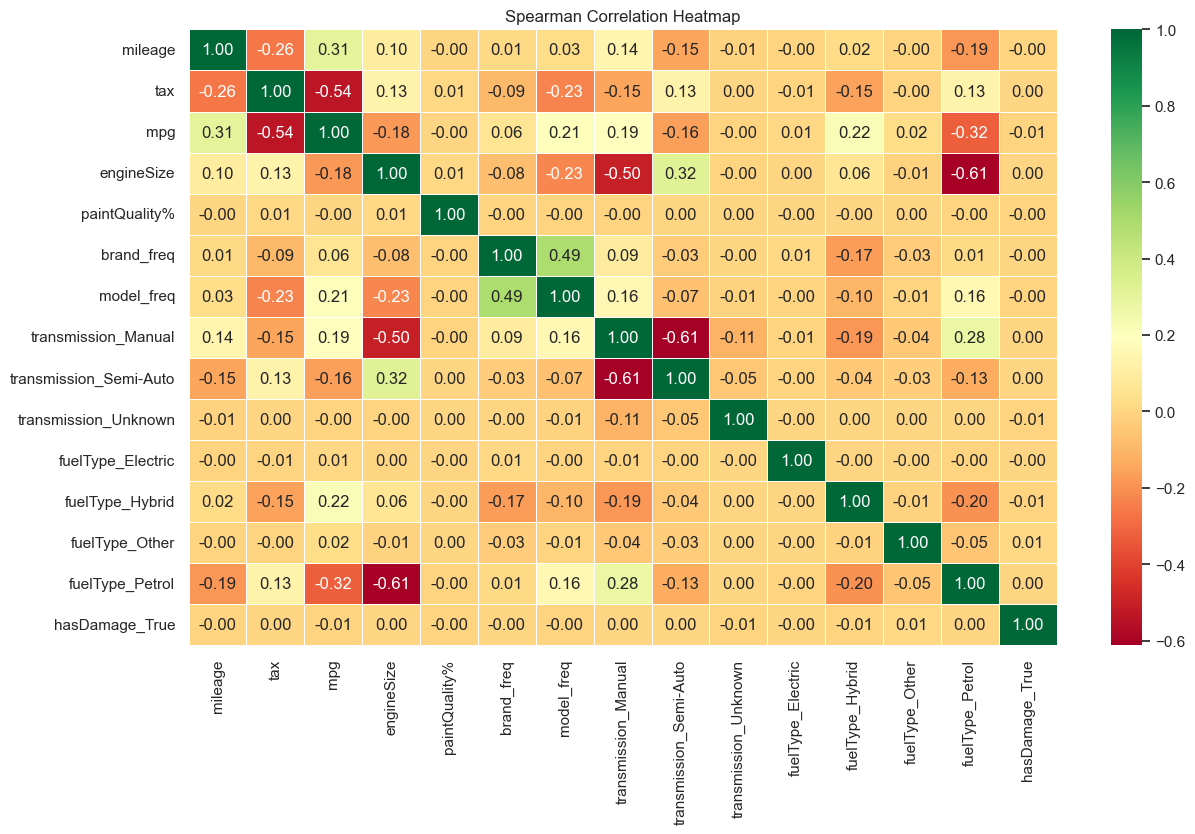

In [83]:
plt.figure(figsize=(14, 8))
sns.heatmap(cor_spearman, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Spearman Correlation Heatmap')
plt.show()


### **<span style="color:#689f38;">Model Evaluation</span>**


#### **<span style="color:#8bc34a;">Metric R squared adjusted</span>**

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

We decided to use R squared adjusted because it helps to account for overfitting

In [106]:
def r2_adjusted(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)  
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

#### **<span style="color:#8bc34a;">Linear Regression</span>**

In [69]:
lin_model = LinearRegression()

In [70]:
lin_model.fit(X_train_final, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
predictions = lin_model.predict(X_val_final)
predictions

array([21330.3370251 , 17034.54740874, 26667.99685925, ...,
       18690.09935877, 21555.17659889, 22107.78124362])

In [88]:
val_results = pd.DataFrame({'y_true': y_val.values.flatten(), 'y_pred': predictions.flatten()}, 
                           index=y_val.index #ensures we can map the predictions to each observation correctly
                           )
val_results.head()

,y_true,y_pred
carID,,
36544,16995,21330.337025
55406,12795,17034.547409
351,32888,26667.996859
28130,20847,23400.026065
52265,24000,21151.254286


In [ ]:
# Training metrics 
y_pred_train = lin_model.predict(X_train_final)

r2_squared = r2_score(y_train, y_pred_train)  
mae_train = mean_absolute_error(y_train, y_pred_train)

print('Training metrics:')
print(f'R²: {r2_squared:.4f}') 
print(f'MAE: {mae_train:.4f}')
print(f'R²adjusted: {r2_squared:.4f}') 

Training metrics:
R²: 0.6578
MAE: 3861.2163
R²squared: 0.6578


In [ ]:
# Validation metrics
r2_val = r2_score(y_val, predictions)
mae_val = mean_absolute_error(y_val, predictions)
r2_squared = r2_score(y_val, predictions)

print('Validation metrics:')
print(f'R²: {r2_val:.4f}')
print(f'MAE: {mae_val:.4f}')
print(f'R²adjusted: {r2_squared:.4f}')

Validation metrics:
R²: 0.6545
MAE: 3890.9547
R²squared: 0.6545


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">

- **Training R²: 0.6578** | **Validation R²: 0.6545** 
  The model explains about **70%** of the variance in the training data, with a slight drop on the validation set, indicating good generalization.

- **Training MAE: 3861.2163.91** | **Validation MAE: 3890.9547**
  The model has a reasonable error of about **$3489** on the training set and slightly higher on the validation set, showing good accuracy.

</div>

#### **<span style="color:#8bc34a;">Model Evaluation</span>**

In [91]:
lin_model.coef_

array([-4130.48662223,  -486.5604619 , -2020.26823289,  4382.04187089,
         -32.89123112,   330.05990726,    75.67882009, -3401.82119002,
        1559.17547713, -1590.38878053, -8060.06327345,  2506.87384461,
        1026.63946778, -1475.8931549 ,  -183.24250274])

In [92]:
coefs = pd.DataFrame(lin_model.coef_)
coefs

,0
0,-4130.486622
1,-486.560462
2,-2020.268233
3,4382.041871
4,-32.891231
5,330.059907
6,75.678820
7,-3401.821190
8,1559.175477
9,-1590.388781


In [93]:
coefs = coefs.set_index(X_train_final.columns)
coefs

,0
mileage,-4130.486622
tax,-486.560462
mpg,-2020.268233
engineSize,4382.041871
paintQuality%,-32.891231
brand_freq,330.059907
model_freq,75.678820
transmission_Manual,-3401.821190
transmission_Semi-Auto,1559.175477
transmission_Unknown,-1590.388781


In [94]:
lin_model.intercept_

np.float64(19215.889407203864)

<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
    The intercept is the expected mean value of Y when all X = 0.  <br>
    Which means that the base price of a car, when all the features have values of 0 (they have no impact on the target), is 19215 dollars.
</div>

#### **<span style="color:#8bc34a;">Calculating the p-values</span>**

In [95]:
# Compare with sklearn coefficients
sk_coef = np.concatenate(([lin_model.intercept_], np.asarray(lin_model.coef_).ravel()))
print('\nSklearn intercept and coefficients:')
print(pd.Series(sk_coef, index=['Intercept'] + list(X_train_final.columns)))


Sklearn intercept and coefficients:
Intercept                 19215.889407
mileage                   -4130.486622
tax                        -486.560462
mpg                       -2020.268233
engineSize                 4382.041871
paintQuality%               -32.891231
brand_freq                  330.059907
model_freq                   75.678820
transmission_Manual       -3401.821190
transmission_Semi-Auto     1559.175477
transmission_Unknown      -1590.388781
fuelType_Electric         -8060.063273
fuelType_Hybrid            2506.873845
fuelType_Other             1026.639468
fuelType_Petrol           -1475.893155
hasDamage_True             -183.242503
dtype: float64


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
    The features that have coefficient close to 0 are possibly more prone to be removed. <br>
    We are keeping them all
</div>

**<span style="color:#8bc34a;">OLS</span>**

In [96]:
# Statsmodels (full statistical summary)

X_sm = X_train_final.reset_index(drop=True)
y_sm = y_train.reset_index(drop=True)


X_sm = sm.add_constant(X_sm)


ols = sm.OLS(y_sm, X_sm).fit()
pd.set_option('display.max_rows', None)

print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     6678.
Date:                Mon, 15 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:27:29   Log-Likelihood:            -5.2449e+05
No. Observations:               52134   AIC:                         1.049e+06
Df Residuals:                   52118   BIC:                         1.049e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.92

In [97]:
# Get the p-values for each feature
p_values = ols.pvalues
print(f"P-values:\n{p_values}")

# Drop features with high p-values (e.g., p-value > 0.05)
features_to_drop = p_values[p_values > 0.05].index
print(f"Features to drop based on p-value > 0.05:\n{features_to_drop}")


P-values:
const                     0.000000e+00
mileage                   0.000000e+00
tax                       1.793073e-57
mpg                       0.000000e+00
engineSize                0.000000e+00
paintQuality%             1.847667e-01
brand_freq                2.640208e-26
model_freq                1.514981e-02
transmission_Manual       0.000000e+00
transmission_Semi-Auto    7.795756e-87
transmission_Unknown      1.337442e-09
fuelType_Electric         1.546814e-01
fuelType_Hybrid           4.368200e-53
fuelType_Other            4.995798e-02
fuelType_Petrol           3.505723e-96
hasDamage_True            2.952831e-01
dtype: float64
Features to drop based on p-value > 0.05:
Index(['paintQuality%', 'fuelType_Electric', 'hasDamage_True'], dtype='object')


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
 

The OLS regression model reveals that **newer, larger-engine, and hybrid vehicles** achieve higher resale prices. Conversely, **older cars, those with higher mileage or manual transmissions**, tend to lose value more rapidly.  <br>
According to the high value of P > |t| (p-value > 0.05), number of **model frequency**, this means that we should drop it because there might not be a causal relationship with the target variable.<br>
For the rest of the features, they have a low value of P > |t| (close to zero) so they have a relationship with the target variable. We should not drop them. 

</div>

In [228]:
X_train_final.drop(
    columns=['hasDamage_True', 'paintQuality%', 'fuelType_Electric', 'fuelType_Other'], 
    inplace=True, 
    errors='ignore'
)

X_val_final.drop(
    columns=['hasDamage_True', 'paintQuality%', 'fuelType_Electric', 'fuelType_Other'], 
    inplace=True, 
    errors='ignore' 
)

cars_test_final.drop(
    columns=['hasDamage_True', 'paintQuality%', 'fuelType_Electric', 'fuelType_Other'], 
    inplace=True, 
    errors='ignore' 
)

In [ ]:


# Fit the model on the reduced feature set
lin_model = LinearRegression()
lin_model.fit(X_train_final, y_train)

# Predict on the training and validation sets
y_train_pred = lin_model.predict(X_train_final)
y_val_pred = lin_model.predict(X_val_final)

# Training set dimensions
n_train = X_train_final.shape[0] 
p_train = X_train_final.shape[1] 
# Validation set dimensions
n_val = X_val_final.shape[0]    
p_val = X_val_final.shape[1]   


# Training metrics
r2_train = r2_score(y_train, y_train_pred)
r2_adj_train = r2_adjusted(y_train, y_train_pred, n=n_train, p=p_train) 
mae_train = mean_absolute_error(y_train, y_train_pred)

# Validation metrics
r2_val = r2_score(y_val, y_val_pred)
r2_adj_val = r2_adjusted(y_val, y_val_pred, n=n_val, p=p_val)
mae_val = mean_absolute_error(y_val, y_val_pred)


# Print the results
print('Training metrics after dropping features:')
print(f'R²: {r2_train:.4f}')
print(f'MAE: {mae_train:.4f}')
# Renamed R²squared to R² adjusted for accuracy
print(f'R² adjusted: {r2_adj_train:.4f}') 

print('\nValidation metrics after dropping features:')
print(f'R²: {r2_val:.4f}')
print(f'MAE: {mae_val:.4f}')
print(f'R² adjusted: {r2_adj_val:.4f}')

Training metrics after dropping features:
R²: 0.6577
MAE: 3861.1068
R² adjusted: 0.6576

Validation metrics after dropping features:
R²: 0.6546
MAE: 3890.4270
R² adjusted: 0.6544


**<span style="color:#8bc34a;">Ridge</span>**

In [100]:


# Training set dimensions
n_train = X_train_final.shape[0] 
p_train = X_train_final.shape[1]

# Validation set dimensions
n_val = X_val_final.shape[0]     
p_val = X_val_final.shape[1]     


# Create Ridge regression model with alpha=1.0
ridge_model = Ridge(alpha=1.0)

# Fit the model
ridge_model.fit(X_train_final, y_train)

# Make predictions
y_pred_ridge_train = ridge_model.predict(X_train_final)
y_pred_ridge_val = ridge_model.predict(X_val_final)


print("Ridge Regression Results:")
print(f"Training R²: {r2_score(y_train, y_pred_ridge_train):.4f}")
print(f"Validation R²: {r2_score(y_val, y_pred_ridge_val):.4f}")
print(f"Training R² adjusted: {r2_adjusted(y_train, y_pred_ridge_train, n=n_train, p=p_train):.4f}") 
print(f"Validation R² adjusted: {r2_adjusted(y_val, y_pred_ridge_val, n=n_val, p=p_val):.4f}") 

print(f"Training MAE: {mean_absolute_error(y_train, y_pred_ridge_train):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_ridge_val):.2f}")


Ridge Regression Results:
Training R²: 0.6577
Validation R²: 0.6546
Training R² adjusted: 0.6576
Validation R² adjusted: 0.6544
Training MAE: 3861.09
Validation MAE: 3890.41


**<span style="color:#8bc34a;">Lasso</span>**

In [101]:
def r2_adjusted(y_true, y_pred, n, p):
    """Calculates the Adjusted R-squared score."""
    # Calculate standard R²
    r2 = r2_score(y_true, y_pred)
    # Adjusted R-squared formula
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Training set dimensions (n = number of rows, p = number of columns)
n_train = X_train_final.shape[0] 
p_train = X_train_final.shape[1] 

# Validation set dimensions
n_val = X_val_final.shape[0]     
p_val = X_val_final.shape[1]     


# Create Lasso regression model with alpha=1.0
lasso_model = Lasso(alpha=1.0, max_iter=10000)

# Fit the model
lasso_model.fit(X_train_final, y_train)

# Make predictions
y_pred_lasso_train = lasso_model.predict(X_train_final)
y_pred_lasso_val = lasso_model.predict(X_val_final)


print("Lasso Regression Results:")

print(f"Training R²: {r2_score(y_train, y_pred_lasso_train):.4f}")
print(f"Validation R²: {r2_score(y_val, y_pred_lasso_val):.4f}")
print(f"Training R² adjusted: {r2_adjusted(y_train, y_pred_lasso_train, n=n_train, p=p_train):.4f}") 
print(f"Validation R² adjusted: {r2_adjusted(y_val, y_pred_lasso_val, n=n_val, p=p_val):.4f}") 

print(f"Training MAE: {mean_absolute_error(y_train, y_pred_lasso_train):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_lasso_val):.2f}")




Lasso Regression Results:
Training R²: 0.6577
Validation R²: 0.6545
Training R² adjusted: 0.6576
Validation R² adjusted: 0.6544
Training MAE: 3860.67
Validation MAE: 3890.09


**<span style="color:#8bc34a;">ElasticNet</span>**

In [102]:


def r2_adjusted(y_true, y_pred, n, p):
    """Calculates the Adjusted R-squared score."""
    # Calculate standard R²
    r2 = r2_score(y_true, y_pred)
    # Adjusted R-squared formula
    # Check for division by zero (n - p - 1)
    if (n - p - 1) <= 0:
        return float('nan')
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Training set dimensions (n = number of rows, p = number of columns)
n_train = X_train_final.shape[0] 
p_train = X_train_final.shape[1] 

# Validation set dimensions
n_val = X_val_final.shape[0]     
p_val = X_val_final.shape[1]     

# Create Elastic Net model with alpha=1.0 and l1_ratio=0.5 (equal mix of L1 and L2)
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)

# Fit the model
elastic_model.fit(X_train_final, y_train)

# Make predictions
y_pred_elastic_train = elastic_model.predict(X_train_final)
y_pred_elastic_val = elastic_model.predict(X_val_final)

print("Elastic Net Regression Results:")

print(f"Training R²: {r2_score(y_train, y_pred_elastic_train):.4f}")
print(f"Validation R²: {r2_score(y_val, y_pred_elastic_val):.4f}")
print(f"Training R² adjusted: {r2_adjusted(y_train, y_pred_elastic_train, n=n_train, p=p_train):.4f}") 
print(f"Validation R² adjusted: {r2_adjusted(y_val, y_pred_elastic_val, n=n_val, p=p_val):.4f}") 

print(f"Training MAE: {mean_absolute_error(y_train, y_pred_elastic_train):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_elastic_val):.2f}")

for feature, coef in zip(X_train_final.columns, elastic_model.coef_): 
    print(f"  {feature}: {coef:.4f}")
    
n_features_selected = sum(elastic_model.coef_ != 0)
print(f"\nFeatures selected: {n_features_selected} out of {len(elastic_model.coef_)}")

Elastic Net Regression Results:
Training R²: 0.5903
Validation R²: 0.5818
Training R² adjusted: 0.5902
Validation R² adjusted: 0.5816
Training MAE: 4090.48
Validation MAE: 4147.11
  mileage: -2637.6893
  tax: 360.2722
  mpg: -1449.7381
  engineSize: 3189.8316
  brand_freq: -6.5499
  model_freq: -81.0866
  transmission_Manual: -1716.6757
  transmission_Semi-Auto: 1053.7218
  transmission_Unknown: -10.0910
  fuelType_Hybrid: 171.6085
  fuelType_Petrol: -813.6336

Features selected: 11 out of 11


**<span style="color:#8bc34a;">Model Comparison</span>**

In [ ]:
def r2_adjusted(y_true, y_pred, n, p):
    """Calculates the Adjusted R-squared score."""
    r2 = r2_score(y_true, y_pred)
    if (n - p - 1) <= 0:
        return float('nan')
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n_train = X_train_final.shape[0] 
p_train = X_train_final.shape[1] 

n_val = X_val_final.shape[0]     
p_val = X_val_final.shape[1]     


# Create comparison dataframe
comparison = pd.DataFrame({
    'Model': ['OLS (sklearn)', 'Ridge', 'Lasso', 'Elastic Net'],
    'Train R²': [
        r2_score(y_train, y_pred_train),
        r2_score(y_train, y_pred_ridge_train),
        r2_score(y_train, y_pred_lasso_train),
        r2_score(y_train, y_pred_elastic_train)
    ],
    'Val R²': [
        r2_score(y_val, lin_model.predict(X_val_final)),
        r2_score(y_val, y_pred_ridge_val),
        r2_score(y_val, y_pred_lasso_val),
        r2_score(y_val, y_pred_elastic_val)
    ],
    'Train MAE': [
        mean_absolute_error(y_train, y_pred_train),
        mean_absolute_error(y_train, y_pred_ridge_train),
        mean_absolute_error(y_train, y_pred_lasso_train),
        mean_absolute_error(y_train, y_pred_elastic_train)
    ],
    'Val MAE': [
        mean_absolute_error(y_val, lin_model.predict(X_val_final)),
        mean_absolute_error(y_val, y_pred_ridge_val),
        mean_absolute_error(y_val, y_pred_lasso_val),
        mean_absolute_error(y_val, y_pred_elastic_val)
    ],
     'Train R² adjusted': [
        r2_adjusted(y_train, y_pred_train, n=n_train, p=p_train), 
        r2_adjusted(y_train, y_pred_ridge_train, n=n_train, p=p_train),
        r2_adjusted(y_train, y_pred_lasso_train, n=n_train, p=p_train),
        r2_adjusted(y_train, y_pred_elastic_train, n=n_train, p=p_train)
    ],
    'Val R² adjusted': [
        r2_adjusted(y_val, lin_model.predict(X_val_final), n=n_val, p=p_val),
        r2_adjusted(y_val, y_pred_ridge_val, n=n_val, p=p_val),
        r2_adjusted(y_val, y_pred_lasso_val, n=n_val, p=p_val),
        r2_adjusted(y_val, y_pred_elastic_val, n=n_val, p=p_val)
    ]
         
})

print("Model Comparison:")
print(comparison)


Model Comparison:
           Model  Train R²    Val R²    Train MAE      Val MAE  \
0  OLS (sklearn)  0.657769  0.654560  3861.216257  3890.426984   
1          Ridge  0.657712  0.654559  3861.085447  3890.409640   
2          Lasso  0.657710  0.654543  3860.674572  3890.086459   
3    Elastic Net  0.590250  0.581842  4090.483858  4147.111947   

   Train R² adjusted  Val R² adjusted  
0           0.657697         0.654390  
1           0.657640         0.654389  
2           0.657638         0.654373  
3           0.590164         0.581636  


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
•⁠  ⁠The <strong>OLS, Ridge, and Lasso</strong> models show almost identical performance, with an <strong>R²</strong> around 0.65 and <strong>MAE</strong> around $3861<br>
•⁠  ⁠This indicates that the model explains about 65% of the variance in car prices, which is a strong result for a linear model<br>
•⁠  ⁠The <strong>Ridge and Lasso</strong> regularization methods did not significantly improve the results, suggesting that the model does not suffer from severe overfitting or high variance<br>
•⁠  ⁠The <strong>Elastic Net</strong> performed worse, with lower R² and higher MAE, meaning the regularization was too strong and removed useful information<br>
•⁠  Conclusion, we are using <strong>Ridge</strong> for the prediction of cars price for the test dataset.
</div>

### **<span style="color:#689f38;">K-Fold Cross Validation</span>**


In [ ]:
def preprocess(X, preproc=None):
    is_train = preproc is None
    X_proc = X.copy()

    # Identify numerical and categorical columns
    if is_train:
        num_cols = X_proc.select_dtypes(include=np.number).columns.tolist()
        cat_cols = [c for c in X_proc.columns if c not in num_cols]
        preproc = {"num_cols": num_cols, "cat_cols": cat_cols}
    else:
        num_cols = preproc["num_cols"]
        cat_cols = preproc["cat_cols"]

    num_cols = [c for c in num_cols if c in X_proc.columns]
    cat_cols = [c for c in cat_cols if c in X_proc.columns]
    num_cols_val = [c for c in num_cols if c in X_proc.columns]

    # Missing values
    # KNN for tax/mpg
    col_KNN = ['tax', 'mpg']
    columns_to_fill = [col for col in X_proc[num_cols] if col not in col_KNN]  # Exclude KNN columns

    for column in columns_to_fill:
        if is_train:
            preproc['median'] = X_proc[column].median()  # Calculate the median of the training set
            X_proc[column] = X_proc[column].fillna(preproc['median'])
        else:
            X_proc[column] = X_proc[column].fillna(preproc['median'])  # Fill missing values in test set with training median

    X_proc['previousOwners'] = X_proc['previousOwners'].astype('int64')

    # Fill NaNs with mode for each categorical feature
    for col in X_proc[cat_cols]:
        if is_train:
            preproc['mode'] = X_proc[col].mode()[0]  # Get the most frequent value (mode)
            X_proc[col] = X_proc[col].fillna(preproc['mode'])  # Fill in the training data
        else:
            X_proc[col] = X_proc[col].fillna(preproc['mode'])  # Fill in the test data with training mode

    # 3. StandardScaler (fit in train, transform in val)
    if is_train:
        scaler_i = StandardScaler()
        # Scale only the numerical columns
        scaled_i = scaler_i.fit_transform(X_proc[num_cols])  # Apply scaling to numeric columns only
        preproc["scaler_i"] = scaler_i  # Save the scaler in preproc for future use
        preproc["columns"] = list(X_proc.columns)  # Save column names for future use
        # Create a DataFrame for the scaled numeric columns
        X_proc_scaled = pd.DataFrame(scaled_i, columns=num_cols, index=X_proc.index)
    else:
        scaler_val_i = preproc["scaler_i"]  # Use the saved scaler from training
        cols = preproc["columns"]  # Use the saved columns from training
        X_proc = X_proc.reindex(columns=cols, fill_value=0)  # Ensure the columns match in validation/test
        # Scale only the numeric columns
        scaled_val_i = scaler_val_i.transform(X_proc[num_cols_val])  # Apply the scaler to numeric columns only
        # Create a DataFrame for the scaled numeric columns
        X_val_scaled = pd.DataFrame(scaled_val_i, columns=num_cols_val, index=X_proc.index)


    if is_train:
        if col_KNN:
            knn_imp = KNNImputer(n_neighbors=5)
            #fit transform only for the training set
            X_proc_scaled[col_KNN] = knn_imp.fit_transform(X_proc_scaled[col_KNN])
            preproc["knn"] = knn_imp
        else:
            preproc["knn"] = None
    else:
        if preproc["knn"] is not None:
            X_val_scaled[col_KNN] = preproc["knn"].transform(X_val_scaled[col_KNN])
    
    if is_train:
        X_proc_unscaled = scaler_i.inverse_transform(X_proc_scaled)
        X_proc_unscaled = pd.DataFrame(X_proc_unscaled, columns=X_proc[num_cols].columns, index=X_proc.index)
        X_proc_train = pd.concat([X_proc_unscaled , X_proc[cat_cols]], axis=1)  
    else:
        X_proc_val_unscaled = scaler_val_i.inverse_transform(X_val_scaled)
        X_proc_val_unscaled = pd.DataFrame(X_proc_val_unscaled, columns=X_proc[num_cols_val].columns, index=X_proc.index)
        X_proc_val = pd.concat([X_proc_val_unscaled , X_proc[cat_cols]], axis=1)   
    
    
    # Winsorizing IQR
    # Indentifying the columns for outlier Treatment (tax, mpg, mileage, engineSize)
    outlier_cols = [c for c in ['tax', 'mpg', 'mileage', 'engineSize'] if c in num_cols]
    if is_train:
        limits = {}
        # Processing the columns for outlier treatment
        for col in outlier_cols:
            Q1 = X_proc_train[col].quantile(0.25)
            Q3 = X_proc_train[col].quantile(0.75)
            IQR = Q3 - Q1
            lo = Q1 - 1.5 * IQR
            hi = Q3 + 1.5 * IQR
            X_proc_train[col] = X_proc_train[col].clip(lo, hi)  # Clipping dos outliers
            limits[col] = (lo, hi)
        
        preproc["limits"] = limits

        # Updating the year for 2020 if it's less than 2020
        X_proc_train.loc[X_proc_train['year'] < 2020, 'year'] = 2020  
        preproc['year'] = 2020 # saving in the prepoc to use later if it's necessary for the validation/test set

    else:
        for col, (lo, hi) in preproc["limits"].items():
            X_proc_val[col] = X_proc_val[col].clip(lo, hi)

        X_proc_val.loc[X_proc_val['year'] < preproc['year'], 'year'] = preproc['year'] 


    # Feature Engineering
    if is_train:
        X_proc_train = feature_engineering(X_proc_train)
        num_cols = X_proc_train.select_dtypes(include=np.number).columns.tolist()
        preproc["num_cols"] = num_cols
    else:
        X_proc_val = feature_engineering(X_proc_val)
        num_cols_val = X_proc_val.select_dtypes(include=np.number).columns.tolist()

    #  Frequency encoding (brand and model)


    if is_train:
        X_proc_cat = X_proc_train[cat_cols]
        brand_freq = X_proc_cat["brand"].value_counts(normalize=True)
        model_freq = X_proc_cat["model"].value_counts(normalize=True)
        X_proc_train["brand_freq"] = X_proc_train["brand"].map(brand_freq).fillna(0)
        X_proc_train["model_freq"] = X_proc_train["model"].map(model_freq).fillna(0)
        num_cols.append("brand_freq")
        num_cols.append("model_freq")
        


        preproc["freq"] = {
            "brand": brand_freq,
            "model": model_freq
        }
    else:
        brand_freq = preproc["freq"]["brand"]
        model_freq = preproc["freq"]["model"]
        X_proc_val["brand_freq"] = X_proc_val["brand"].map(brand_freq).fillna(0)
        X_proc_val["model_freq"] = X_proc_val["model"].map(model_freq).fillna(0)
        num_cols_val.append("brand_freq")
        num_cols_val.append("model_freq")


    # One-Hot Encoding (OHE)
    ohe_cols = ['transmission', 'fuelType', 'hasDamage']

    if is_train:
        # Fit the OneHotEncoder on the training data
        ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
        arr = ohe.fit_transform(X_proc_train[ohe_cols])
        
        # Get the correct column names after encoding
        names = list(ohe.get_feature_names_out(ohe_cols))  # Get new column names from OHE
        preproc["ohe"] = ohe
        
        # Create the DataFrame using the correct number of columns (from OHE)
        X_cat_final = pd.DataFrame(arr, columns=names, index=X_proc_train[ohe_cols].index)
    else:
        # Use the fitted OneHotEncoder to transform the validation/test data
        ohe = preproc["ohe"]
        arr = ohe.transform(X_proc_val[ohe_cols])
        names = list(ohe.get_feature_names_out(ohe_cols))
        
        # Create the DataFrame for validation/test data 
        X_cat_final_val = pd.DataFrame(arr, columns=names, index=X_proc_val[ohe_cols].index)

    # Final Scaling
    # StandardScaler only for numeric columns
    if is_train:
        scaler = StandardScaler()
        X_num_scaled = scaler.fit_transform(X_proc_train[num_cols])
        preproc["scaler"] = scaler
        X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=num_cols, index=X_proc.index)
    else:
        scaler = preproc["scaler"]
        X_num_scaled = scaler.transform(X_proc_val[num_cols_val])
        X_num_scaled_df_val = pd.DataFrame(X_num_scaled, columns=num_cols_val, index=X_proc.index)

  
    
    if is_train:
        X_train_final = pd.concat([X_num_scaled_df, X_cat_final], axis=1)
        return X_train_final, preproc
    else:
        X_val_final = pd.concat([X_num_scaled_df_val, X_cat_final_val], axis=1)
        return X_val_final, preproc


# Model Training and Evaluation Functions
def run_model(X, y, model=None):
    Xp, preproc = preprocess(X, None)
    if model is None:
        model = Lasso(alpha=1.0)
    model.fit(Xp, y)
    return model, preproc


def evaluate_model(X, y, model, preproc):
    Xp, _ = preprocess(X, preproc)
    preds = model.predict(Xp)
    return r2_score(y, preds), r2_adjusted(y, preds)


def avg_score(method, X, y, model=None):
    tr_scores = []
    val_scores = []

    for tr_idx, val_idx in method.split(X, y):
        Xtr, Xv = X.iloc[tr_idx], X.iloc[val_idx]
        ytr, yv = y.iloc[tr_idx], y.iloc[val_idx]

        mdl, preproc = run_model(Xtr, ytr, model)
        tr = evaluate_model(Xtr, ytr, mdl, preproc)
        vl = evaluate_model(Xv, yv, mdl, preproc)

        tr_scores.append(tr)
        val_scores.append(vl)

    print("Train R²:", np.mean(tr_scores))
    print("Val R²:", np.mean(val_scores))

    return tr_scores, val_scores


In [130]:
def evaluate_model(X, y, model, preproc):
    #Preprocess and predict
    Xp, _ = preprocess(X, preproc)
    preds = model.predict(Xp)
    
    #Calculate n and p (n=rows of X, p=columns of Xp)
    n = X.shape[0]     
    p = Xp.shape[1]     
    
    #Return metrics, passing n and p to r2_adjusted
    return r2_score(y, preds), r2_adjusted(y, preds, n=n, p=p)
# Train the model using the training data
model, preproc = run_model(X_train, y_train, model)
# Evaluate the model's performance on the test data
test_r2, test_r2_adj = evaluate_model(X_val, y_val, model, preproc) 

print(f"Test R²: {test_r2:.4f} and R² adjusted: {test_r2_adj:.4f}")


Test R²: 0.6487 and R² adjusted: 0.6484


<span style="color:#8bc34a;">Using CV for Lasso</span>

In [ ]:
# Initialize cross-validation method (e.g., 5-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Call avg_score function for cross-validation
tr_scores, val_scores = avg_score(kf, X, y, model=None) #for lasso


# Print average R² scores for training and validation sets
print("Average Train R²:", np.mean(tr_scores))
print("Average Validation R²:", np.mean(val_scores))


Train R²: 0.6497175174385315
Val R²: 0.6493732391959056
Average Train R²: 0.6497175174385315
Average Validation R²: 0.6493732391959056


<span style="color:#8bc34a;">Using CV for Ridge</span>

In [ ]:
# Initialize cross-validation method (e.g., 5-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Call avg_score function for cross-validation
tr_scores, val_scores = avg_score(kf, X, y, model=Ridge(alpha = 1.0)) #for ridge


# Print average R² scores for training and validation sets
print("Average Train R²:", np.mean(tr_scores))
print("Average Validation R²:", np.mean(val_scores))


Train R²: 0.6497333644085461
Val R²: 0.6493449415673749
Average Train R²: 0.6497333644085461
Average Validation R²: 0.6493449415673749


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
Looking at the results, after performing CV for linear models, we think that Ridge is the best model.
However, we are going to do other models to check if we get better results
</div>

### **<span style="color:#689f38;">KNN</span>**


In [71]:
modelKNN_Reg = KNeighborsRegressor()

In [72]:
modelKNN_Reg.fit(X = X_train_final, y = y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [73]:
labels_train = modelKNN_Reg.predict(X_train_final)
labels_val = modelKNN_Reg.predict(X_val_final)

In [74]:
modelKNN_Reg.score(X_train_final, y_train)

0.9161586285143891

In [75]:
modelKNN_Reg.score(X_val_final, y_val)

0.8694288055635411

In [76]:
print(mean_absolute_error(y_train, labels_train))
print(mean_absolute_error(y_val, labels_val))

1610.0702497410518
2034.703419262442


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
The training R² value is 0.9162. This means that the model can explain 91.62% of the variance in the training data. It suggests that the model is fitting the training data very well.
The validation R² value is 0.8694. This indicates that the model explains 86.94% of the variance in the validation data. While this is still a solid result, we notice a light drop from the training R², which suggests the model is slightly overfitting.
The mean absolute error (MAE) on the training data is 1610.07. This means that, on average, the model's predictions are off by1610.07 units from the actual values in the training set.
The MAE on the validation data is 2034.70. This is higher than the training MAE, indicating that the model's performance is slightly worse on the validation set than it is on the training set.
The model is doing a great job on the training data, with a high R²and relatively low MAE. However, we observe that the performance on the validation data is slightly worse (lower R² and higher MAE), suggesting overfitting.
</div>

In [78]:
numberK_list=np.arange(1,7)
low_MAE=1000
nof=0           
mae_list_train =[]
mae_list_val =[]
for n in numberK_list:
    model = KNeighborsRegressor(n_neighbors = n).fit(X_train_final, y_train)
    pred_train_knn = model.predict(X_train_final)
    pred_val_knn = model.predict(X_val_final)
    error_train = mean_absolute_error(y_train, pred_train_knn)
    error_val = mean_absolute_error(y_val, pred_val_knn)
    mae_list_train.append(error_train)
    mae_list_val.append(error_val)
    print('Number of neighbors: ' + str(n))
    print(error_train)
    print(error_val)
    print("Difference train and validation:", str(error_val - error_train))
    print('....................')

Number of neighbors: 1
66.85508497333794
2233.574829931973
Difference train and validation: 2166.719744958635
....................
Number of neighbors: 2
1119.0311792688074
2076.488184747583
Difference train and validation: 957.4570054787757
....................
Number of neighbors: 3
1373.0658751166864
2040.2305615228547
Difference train and validation: 667.1646864061684
....................
Number of neighbors: 4
1513.5478478536081
2030.169765932689
Difference train and validation: 516.6219180790808
....................
Number of neighbors: 5
1610.0702497410518
2034.703419262442
Difference train and validation: 424.6331695213901
....................
Number of neighbors: 6
1681.4949233385764
2038.906917591598
Difference train and validation: 357.4119942530215
....................


In [79]:
# Fit the model for initial KNN and get the MAE for train and validation
modelKNN_Reg = KNeighborsRegressor()
modelKNN_Reg.fit(X_train_final, y_train)
labels_train = modelKNN_Reg.predict(X_train_final)
labels_val = modelKNN_Reg.predict(X_val_final)

# Print initial performance
print("Initial model performance:")
print(f"Train MAE: {mean_absolute_error(y_train, labels_train):.4f}")
print(f"Validation MAE: {mean_absolute_error(y_val, labels_val):.4f}")

# Set up a list of neighbors to try
numberK_list = np.arange(1, 11)

# Initialize variables to track the best model
low_MAE = float('inf')  # Initialize to a very high value
best_nof = 0
mae_list_train = []
mae_list_val = []

# Loop over different values of n_neighbors
for n in numberK_list:
    model = KNeighborsRegressor(n_neighbors=n).fit(X_train_final, y_train)
    
    # Predictions for both train and validation sets
    pred_train_knn = model.predict(X_train_final)
    pred_val_knn = model.predict(X_val_final)
    
    # Calculate MAE for both train and validation
    mae_train = mean_absolute_error(y_train, pred_train_knn)
    mae_val = mean_absolute_error(y_val, pred_val_knn)
    
    # Append the results to lists
    mae_list_train.append(mae_train)
    mae_list_val.append(mae_val)
    
    # Check if this model has the lowest MAE on validation data
    if mae_val < low_MAE:
        low_MAE = mae_val
        best_nof = n
    
    # Print the results for the current n_neighbors
    print(f"Number of neighbors: {n}")
    print(f"Train MAE: {mae_train:.4f}")
    print(f"Validation MAE: {mae_val:.4f}")
    print(f"Difference between train and validation MAE: {mae_val - mae_train:.4f}")
    print("---------------")

# Print the best model results
print("\nBest model found:")
print(f"Best number of neighbors: {best_nof}")
print(f"Train MAE with {best_nof} neighbors: {mae_list_train[best_nof-1]:.4f}")
print(f"Validation MAE with {best_nof} neighbors: {low_MAE:.4f}")


Initial model performance:
Train MAE: 1610.0702
Validation MAE: 2034.7034
Number of neighbors: 1
Train MAE: 66.8551
Validation MAE: 2233.5748
Difference between train and validation MAE: 2166.7197
---------------
Number of neighbors: 2
Train MAE: 1119.0312
Validation MAE: 2076.4882
Difference between train and validation MAE: 957.4570
---------------
Number of neighbors: 3
Train MAE: 1373.0659
Validation MAE: 2040.2306
Difference between train and validation MAE: 667.1647
---------------
Number of neighbors: 4
Train MAE: 1513.5478
Validation MAE: 2030.1698
Difference between train and validation MAE: 516.6219
---------------
Number of neighbors: 5
Train MAE: 1610.0702
Validation MAE: 2034.7034
Difference between train and validation MAE: 424.6332
---------------
Number of neighbors: 6
Train MAE: 1681.4949
Validation MAE: 2038.9069
Difference between train and validation MAE: 357.4120
---------------
Number of neighbors: 7
Train MAE: 1733.9731
Validation MAE: 2052.6110
Difference betwee

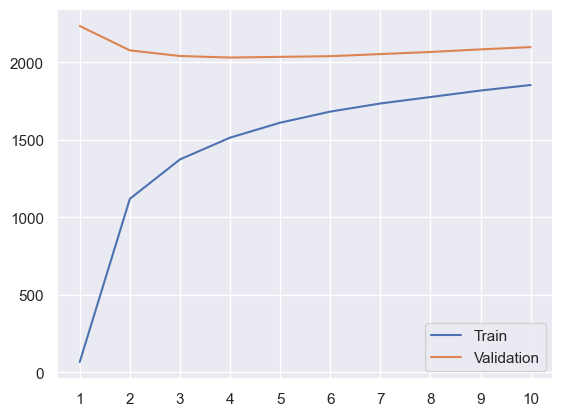

In [80]:
plt.plot(numberK_list, mae_list_train, label='Train')
plt.plot(numberK_list, mae_list_val, label = 'Validation')
plt.xticks(numberK_list)
plt.legend()

<span style="color:#8bc34a;">Changing metrics to see which one is better</span>

In [81]:
neighbors_range = np.arange(1, 6)  # Testing 1 to 5 neighbors
metrics = ['euclidean', 'manhattan', 'minkowski']   # Different distance metrics
weights = ['uniform', 'distance']  # Uniform or distance weighting
algorithms = ['auto','kd_tree', 'brute']  # Algorithms to compute nearest neighbors

# Initialize a list to store results
results = []

# Iterate over all combinations of hyperparameters
for n_neighbors in neighbors_range:
    for metric in metrics:
        for weight in weights:
            for algorithm in algorithms:
                # Define and train the model
                model = KNeighborsRegressor(
                    n_neighbors=n_neighbors,
                    metric=metric,
                    weights=weight,
                    algorithm=algorithm
                )
                model.fit(X_train_final, y_train)

                # Make predictions and evaluate the model
                y_train_pred = model.predict(X_train_final)
                y_val_pred = model.predict(X_val_final)
                mae_train = mean_absolute_error(y_train, y_train_pred)
                mae_val = mean_absolute_error(y_val, y_val_pred)

                # Store the results
                results.append({
                    "Neighbors": n_neighbors,
                    "Metric": metric,
                    "Weights": weight,
                    "Algorithm": algorithm,
                    "Train MAE": mae_train,
                    "Validation MAE": mae_val
                })

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results)
results_df

,Neighbors,Metric,Weights,Algorithm,Train MAE,Validation MAE
0,1,euclidean,uniform,auto,66.855085,2233.574830
1,1,euclidean,uniform,kd_tree,66.855085,2233.574830
2,1,euclidean,uniform,brute,66.056547,2232.532313
3,1,euclidean,distance,auto,66.855085,2233.574830
4,1,euclidean,distance,kd_tree,66.855085,2233.574830
...,...,...,...,...,...,...
85,5,minkowski,uniform,kd_tree,1610.070250,2034.703419
86,5,minkowski,uniform,brute,1609.426090,2033.336099
87,5,minkowski,distance,auto,59.894371,1967.285872
88,5,minkowski,distance,kd_tree,59.894371,1967.285872


In [86]:
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(results_df)


    Neighbors     Metric   Weights Algorithm    Train MAE  Validation MAE
0           1  euclidean   uniform      auto    66.855085     2233.574830
1           1  euclidean   uniform   kd_tree    66.855085     2233.574830
2           1  euclidean   uniform     brute    66.056547     2232.532313
3           1  euclidean  distance      auto    66.855085     2233.574830
4           1  euclidean  distance   kd_tree    66.855085     2233.574830
5           1  euclidean  distance     brute    66.056547     2232.532313
6           1  manhattan   uniform      auto    66.855085     2138.018842
7           1  manhattan   uniform   kd_tree    66.855085     2138.018842
8           1  manhattan   uniform     brute    67.339817     2138.605487
9           1  manhattan  distance      auto    66.855085     2138.018842
10          1  manhattan  distance   kd_tree    66.855085     2138.018842
11          1  manhattan  distance     brute    67.339817     2138.605487
12          1  minkowski   uniform    

<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">

The best number of neighbors with the lowest MAE (Mean Absolute Error) on the validation set is 5, the best distance metric is Minkowski and weighting method that performed best is distance. The best-performing algorithm is kd_tree.<br>

This shows that the model with 5 neighbors, using the Minkowski metric and the kd_tree algorithm, gives the best performance, especially on the training set, with a reasonable error difference on the validation set.

</div>

<span style="color:#8bc34a;">Final KNN model</span>

In [153]:
model_KNN = KNeighborsRegressor(
                    n_neighbors=5,
                    metric='minkowski',
                    weights='distance',
                    algorithm='auto'
                )
model_KNN.fit(X_train_final, y_train)

,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### **<span style="color:#689f38;">Decision Tree</span>**

In [120]:
def avg_score(model, X, y):
    # apply kfold
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    score_train_r2 = []
    score_val_r2 = []
    timer = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # start time
        begin = time.perf_counter()
        model.fit(X_train, y_train)
        end = time.perf_counter()

        # predictions
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)


        # R2
        r2_train = r2_score(y_train, train_pred)
        r2_val = r2_score(y_val, val_pred)

        score_train_r2.append(r2_train)
        score_val_r2.append(r2_val)
        timer.append(end - begin)

    # compute averages + std
    avg_time = round(np.mean(timer), 3)
    avg_train_r2 = round(np.mean(score_train_r2), 3)
    avg_val_r2 = round(np.mean(score_val_r2), 3)

    std_time = round(np.std(timer), 3)
    std_train_r2 = round(np.std(score_train_r2), 3)
    std_val_r2 = round(np.std(score_val_r2), 3)

    return {
        "Time": f"{avg_time} +/- {std_time}",
        "R2 Train": f"{avg_train_r2} +/- {std_train_r2}",
        "R2 Val": f"{avg_val_r2} +/- {std_val_r2}"
    }



In [121]:
def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call avg_score
    """
    count = 0
    for model in args:
        results = avg_score(model, X_train_final, y_train)
        df.iloc[count] = [
            results["R2 Train"],
            results["R2 Val"],
            results["Time"]
        ]
        count += 1
    return (
    results["Time"],
    results["R2 Train"],
    results["R2 Val"]
)



In [122]:
def plot_tree(model):
    dot_data = export_graphviz(
        model,
        feature_names=X_train_final.columns,
        filled=True,
        rounded=True,
        precision=2,
        impurity=True,    
        proportion=False
    )

    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,20"')  

    return graphviz.Source(pydot_graph.to_string())

In [123]:
dt_reg = DecisionTreeRegressor()  
dt_reg.fit(X_train_final, y_train)
y_pred = dt_reg.predict(cars_test_final) 

In [124]:
print('The defined tree has a depth of ' + str(dt_reg.get_depth()) + ', ' + str(dt_reg.tree_.node_count) + 
      ' nodes and a total of ' + str(dt_reg.get_n_leaves()) + ' leaves.')

The defined tree has a depth of 42, 97009 nodes and a total of 48505 leaves.


In [125]:
#Changing the splitter
dt_random = DecisionTreeRegressor(splitter = 'random').fit(X_train_final, y_train)

In [126]:

# Create empty DataFrame with all columns
df = pd.DataFrame(
    columns=[

        "Train R²", "Test R²",
        "Training Time (s)"
    ],
    index=['default', 'random']
)

# Fill the table
show_results(df, dt_reg, dt_random)
print(df)

              Train R²          Test R² Training Time (s)
default  0.998 +/- 0.0  0.839 +/- 0.016    0.242 +/- 0.04
random   0.998 +/- 0.0  0.801 +/- 0.026   0.097 +/- 0.004


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
The Train R² for both the "Default" and "Random" models is very high (0.998), indicating that both models fit the training data almost perfectly.<br>
The Test R² for the "Default" model is 0.838, while the "Random" model has a lightly lower R² of 0.813.<br>
This suggests that the Default model generalizes better on the validation set, but both models perform well on unseen data, still need to tune hyperparameters
</div

In [127]:
def calculate_R2(interval, parameter='depth'):
    train_results = []
    test_results = []

    for depth in interval:
        dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
        dt.fit(X_train_final, y_train)  # train on full training set

        # Evaluate on training set
        train_pred = dt.predict(X_train_final)
        r2_train = r2_score(y_train, train_pred)
        train_results.append(round(r2_train, 3))

        # Evaluate on validation set
        val_pred = dt.predict(X_val_final)
        r2_val = r2_score(y_val, val_pred)  # make sure you have y_val corresponding to cars_test_final
        test_results.append(round(r2_val, 3))

    best_train_depth = interval[np.argmax(train_results)]
    best_test_depth = interval[np.argmax(test_results)]

    print(f'The best R2 score for train is {max(train_results)} at depth {best_train_depth}')
    print(f'The best R2 score for test is {max(test_results)} at depth {best_test_depth}')

    plt.plot(interval, train_results, label="Train R2")
    plt.plot(interval, test_results, label="Test R2")
    plt.xticks(interval)
    plt.legend()
    plt.ylabel("R2 score")
    plt.xlabel(str(parameter))
    plt.show()

The best R2 score for train is 0.954 at depth 14
The best R2 score for test is 0.856 at depth 13


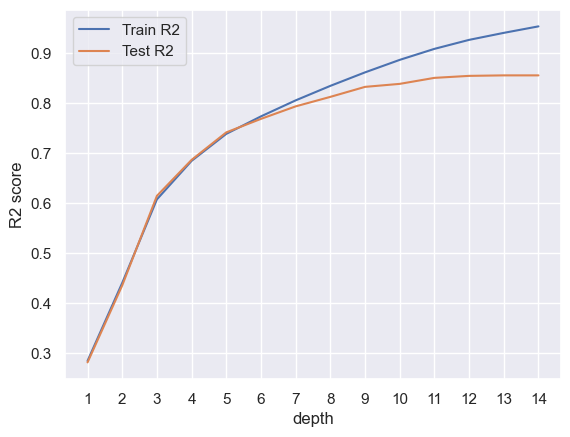

In [128]:
calculate_R2(np.arange(1,15), 'depth')

In [129]:
# Changing the maximum depth of the tree
dt_depth14 = DecisionTreeRegressor(max_depth = 14).fit(X_train_final, y_train)

In [130]:
df = pd.DataFrame(columns = ['Train','Test', 'Time'], index = ['full','depth14'])
show_results(df,dt_reg, dt_depth14)
print(df)

                   Train             Test             Time
full       0.998 +/- 0.0  0.835 +/- 0.013  0.239 +/- 0.039
depth14  0.954 +/- 0.001  0.854 +/- 0.014  0.148 +/- 0.004


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">

We tested a **Decision Tree Regressor** with **max_depth = 14** to see how restricting the tree depth affects performance.

**Training R²**: The model with full depth achieves **0.998**, while the depth-limited model (max_depth=14) scores **0.954**.<br>
**Testing R²**: The model with full depth scores **0.835**, while the depth-limited model performs slightly worse at **0.854**.<br>

Limiting the depth of the tree improves **generalization** and reduces **training time**, but it comes at the cost of slightly reduced performance on both training and validation sets.
</div>

In [131]:
# Changing the minimum nbr of samples required to split an internal node
# 200
dt_min200 = DecisionTreeRegressor(min_samples_split = 200).fit(X_train_final, y_train)

In [132]:
# 700
dt_min700 = DecisionTreeRegressor(min_samples_split =700).fit(X_train_final, y_train)

df = pd.DataFrame(columns = ['Train','Test', 'Time'], index = ['dt_min200','dt_min700'])
show_results(df, dt_min200, dt_min700)
print(df)

                     Train             Test             Time
dt_min200  0.841 +/- 0.001  0.823 +/- 0.013   0.12 +/- 0.033
dt_min700  0.782 +/- 0.004  0.773 +/- 0.017  0.088 +/- 0.003


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">

**Training R²**: Both models perform similarly on the **training data**. The **"dt_min200"** model has a **slightly higher training R²** (0.840 vs 0.782), meaning it is better fitted to the training set.
  
**Test R²**: The **"dt_min200"** model also performs slightly better on the **test data** (0.841 vs 0.782), indicating better **generalization** to unseen data.
The **"dt_min700"** model has a **lower test R²**, suggesting that **increasing the min_samples_split** might have resulted in a less flexible model.

**Training Time**: The **"dt_min700"** model took **less time to train** (0.12s) compared to the **"dt_min200"** model (0.088s), which is expected since a larger value for min_samples_split results in fewer splits and hence less model complexity.


In Conclusion, **"dt_min200"** is performing **better in terms of R²** but is slightly more **complex**, while **"dt_min700"** is **faster to train** and **less prone to overfitting** due to stricter splitting conditions.
<div>

In [133]:
# Changing the minimum number of samples required to be at a leaf node
dt_min_sam100 = DecisionTreeRegressor(min_samples_leaf = 100).fit(X_train_final, y_train)

In [134]:
dt_min_sam500 = DecisionTreeRegressor(min_samples_leaf = 500).fit(X_train_final, y_train)

In [135]:
df = pd.DataFrame(columns = ['Train','Test','Time'], index = ['Original','dt_min_sam100','dt_min_sam500'])
show_results(df,dt_reg, dt_min_sam100, dt_min_sam500)
print(df)

                         Train             Test             Time
Original         0.998 +/- 0.0  0.838 +/- 0.017   0.29 +/- 0.179
dt_min_sam100  0.813 +/- 0.001  0.801 +/- 0.016    0.1 +/- 0.009
dt_min_sam500  0.743 +/- 0.002  0.739 +/- 0.017  0.072 +/- 0.002


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">

**Training R²**: The **original model** performs best on the **training data** (R² = 0.998). Both the **min_samples_leaf = 100** and **min_samples_leaf = 500** models have significantly lower **train R²**, indicating they are less fit to the training data.
  
**Test R²**: The models with **min_samples_leaf = 100** and **min_samples_leaf = 500** perform slightly worse on the **test data** than the **original model**. This suggests the **more restricted trees** generalize less well than the deeper, unconstrained tree.


Conclusion: **"Original"** model is the best in terms of **R²**, but it is prone to overfitting as it is deeper and more complex **"dt_min_sam100"** and **"dt_min_sam500"** models are faster and more generalizable, but they **suffer in training performance**.
If **speed** is more important, **min_samples_leaf** values of **100 or 500** might be preferred.
<div>

In [136]:
# Changing the number of features to consider when looking for the best split
dt_none = DecisionTreeRegressor(max_features = None).fit(X_train_final, y_train)
dt_int = DecisionTreeRegressor(max_features = 2).fit(X_train_final, y_train)
dt_float = DecisionTreeRegressor(max_features = 0.5).fit(X_train_final, y_train)
dt_auto = DecisionTreeRegressor(max_features = 'sqrt').fit(X_train_final, y_train)
dt_log2 = DecisionTreeRegressor(max_features = 'log2').fit(X_train_final, y_train)

In [137]:
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['None (Baseline)','Int','Float','Sqrt','Log2'])
show_results(df,dt_none, dt_int, dt_float, dt_auto, dt_log2)
print(df)

                          Time            Train             Test
None (Baseline)  0.998 +/- 0.0  0.835 +/- 0.017    0.22 +/- 0.01
Int              0.998 +/- 0.0  0.813 +/- 0.015  0.084 +/- 0.003
Float            0.998 +/- 0.0   0.822 +/- 0.02   0.12 +/- 0.005
Sqrt             0.998 +/- 0.0  0.824 +/- 0.021  0.096 +/- 0.004
Log2             0.998 +/- 0.0  0.808 +/- 0.014  0.097 +/- 0.004


In [138]:
# Choosing the best combinations and create DT for example:
dt_int2 = DecisionTreeRegressor(max_features = 2, max_depth = 2).fit(X_train_final, y_train)
dt_int3 = DecisionTreeRegressor(max_features = 2, max_depth = 2).fit(X_train_final, y_train)

In [139]:
# Define the total number of leaf nodes
dt_maxleaf5 = DecisionTreeRegressor(max_leaf_nodes = 5).fit(X_train_final, y_train)

df = pd.DataFrame(columns = ['Train','Test', 'Time'], index = ['Baseline','dt_maxleaf5'])
show_results(df,dt_reg, dt_maxleaf5)
print(df)

                       Train             Test             Time
Baseline       0.998 +/- 0.0  0.835 +/- 0.016  0.225 +/- 0.029
dt_maxleaf5  0.546 +/- 0.002   0.545 +/- 0.02  0.035 +/- 0.001


In [140]:
# Decide if a node will be split according to the decrease of impurity
dt_impurity02 = DecisionTreeRegressor(min_impurity_decrease=0.02).fit(X_train_final, y_train)

df = pd.DataFrame(columns = ['Train','Test','Time'], index = ['Baseline','dt_impurity02'])
show_results(df,dt_reg, dt_impurity02)
print(df)

                       Train             Test             Time
Baseline       0.998 +/- 0.0  0.834 +/- 0.016  0.399 +/- 0.151
dt_impurity02  0.998 +/- 0.0  0.836 +/- 0.017  0.257 +/- 0.059


In [141]:
# Use a decision tree to evaluate feature importance
dt_reg_importance = DecisionTreeRegressor().fit(X_train_final, y_train).feature_importances_
dt_reg_importance

array([0.25764746, 0.02187521, 0.07566239, 0.23825253, 0.0320477 ,
       0.07572121, 0.28535089, 0.0033953 , 0.00044486, 0.00282904,
       0.00677341])

<Axes: xlabel='Value', ylabel='Col'>

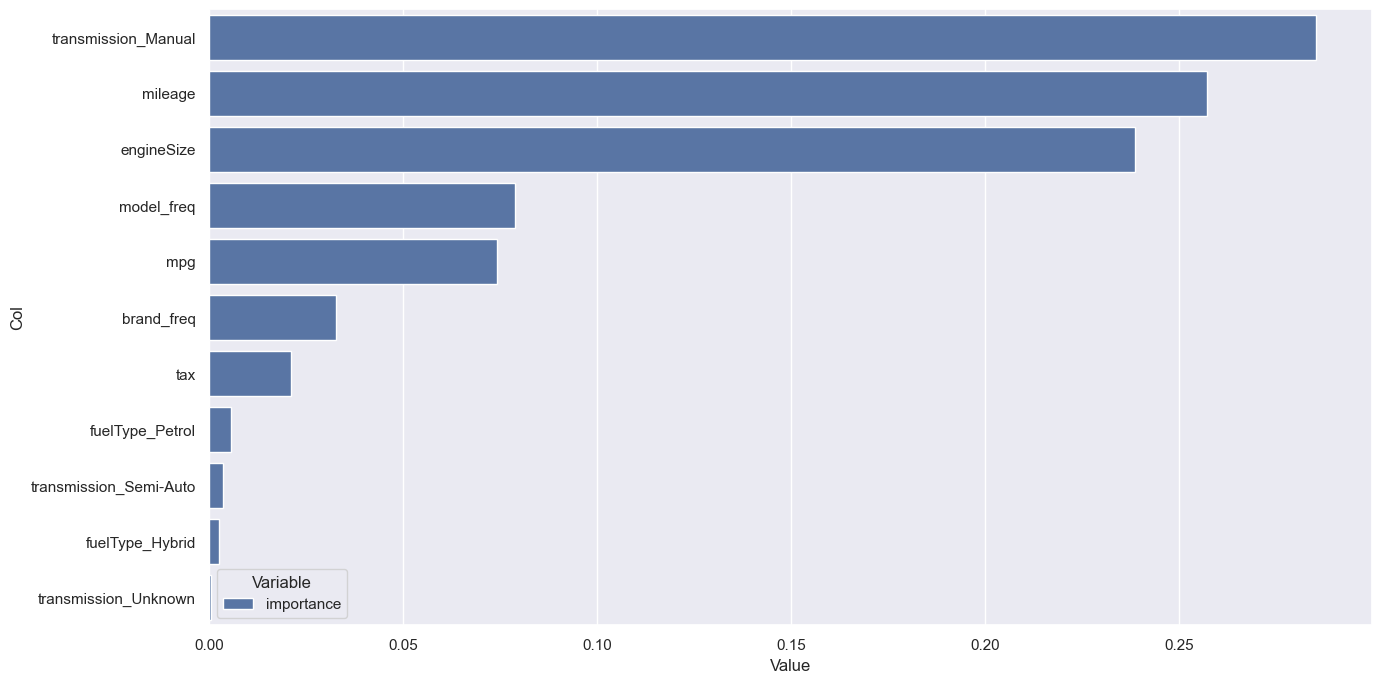

In [ ]:
zippy = pd.DataFrame(zip(dt_reg_importance), columns=['importance'])
zippy['col'] = X_train_final.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
This bar plot visualizes the importance of various features in predicting car prices based on a Decision Tree Regressor. The features are ranked by their importance, with the most impactful features shown at the top.

**Top Features**: 
**Transmission (Manual)** and **Mileage** have the highest importance, suggesting that the type of transmission and the car's mileage are crucial factors in predicting its price.
**Engine Size** and **Model Frequency** are also important, indicating that the size of the engine and the popularity of the model play significant roles in determining the price.


**Less Impactful Features**:
**Transmission (Unknown)** and **Fuel Type (Hybrid)** have the least influence, indicating that either these features don't vary much in the dataset or don't have a significant correlation with the price.
<div>

<span style="color:#8bc34a;">Final Conclusion for Decision Tree</span>

<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
In this section, we go back to the conclusion we had before in the feature selection part, where all the features we kept 
are important according to the decision tree regressor, but the levels of importance is different from a feature to another and the order 
of imporatance is clearly stated in the bar chart above. 

Having said that, the best model for Decision Tree is the one that has as min samples split as 200.
<div>

In [180]:
model_DecisionTree = DecisionTreeRegressor(min_samples_split = 200).fit(X_train_final, y_train)

### **<span style="color:#689f38;">Random Forest</span>**

In [176]:
#Log-transform target

y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)


#Initialize model

rf = RandomForestRegressor(random_state=42, n_jobs=-1)


#Hyperparameter space

param_distributions = {
    'n_estimators': np.arange(100, 600, 100),
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}


#Randomized Search (RMSE)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1
)


#Fit model

random_search.fit(X_train_final, y_train_log)

print("Best hyperparameters:", random_search.best_params_)


#Predictions (log scale)

y_train_pred_log = random_search.predict(X_train_final)
y_val_pred_log = random_search.predict(X_val_final)


#Back-transform

y_train_pred = np.expm1(y_train_pred_log)
y_val_pred = np.expm1(y_val_pred_log)


# Metrics (original scale)
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)

train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("\nTRAIN METRICS")
print(f"R²   : {train_r2:.4f}")
print(f"RMSE : {train_rmse:.2f}")
print(f"MAE  : {train_mae:.2f}")

print("\nVALIDATION METRICS")
print(f"R²   : {val_r2:.4f}")
print(f"RMSE : {val_rmse:.2f}")
print(f"MAE  : {val_mae:.2f}")




Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'n_estimators': np.int64(300), 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}

TRAIN METRICS
R²   : 0.9440
RMSE : 2289.37
MAE  : 1266.56

VALIDATION METRICS
R²   : 0.8978
RMSE : 3162.35
MAE  : 1748.03


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
We performed RandomizedSearchCV to find the best hyperparameters for the Random Forest Regressor model. Below are the key results based on the tuning process:<br>

**Best Hyperparameters**:
- **n_estimators**: 50
- **min_samples_split**: 5
- **min_samples_leaf**: 2
- **max_features**: sqrt
- **max_depth**: None

**Model Performance**:<br>
**Training**:
  - **MAE**: 1266.56
  - **R²**: 0.9440<br>

**Validation**:
  - **MAE**: 1748.03
  - **R²**: 0.8978


To conclude, the **Random Forest** model with the tuned hyperparameters provided excellent performance on the training data with a very high R².
However, there was a performance gap between training and validation, indicating some level of overfitting. The model is more fit to the training data than to the unseen validation data.
<div>

<span style="color:#8bc34a;">Final Model for Random Forest</span>

In [229]:
model_RandomForest = RandomForestRegressor(
    random_state=42, 
    n_jobs=-1,
    n_estimators=300, 
    max_depth=None,    
    min_samples_split=5,  
    min_samples_leaf=2,  
    max_features='sqrt'  
)


model_RandomForest.fit(X_train_final, y_train)


predictions = model_RandomForest.predict(X_val_final)


test_mae = mean_absolute_error(y_val, predictions)
test_mse = mean_squared_error(y_val, predictions)

print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")

Test MAE: 1740.1444104126383
Test MSE: 8960881.675681336


### **<span style="color:#689f38;">Neural Networks</span>**

In [107]:
# Lists of parameters to test
activation_functions = ['relu', 'tanh']  # Activation functions to test
learning_rates = [0.001]  # Learning rate default to test
solvers = ['adam', 'sgd']  # Solvers to test (Adam and SGD)

# Number of features in the training data (X_train)
num_features = X_train.shape[1]  # Number of features in the dataset
architectures = [(num_features, num_features)]  # Different architectures

# List to store the results
results = []

# Loop to test different combinations of parameters
for layers in architectures:
    for activation in activation_functions:
        for lr in learning_rates:
            for solver in solvers:
                print(f"Training model with architecture: {layers}, activation: {activation}, "
                      f"learning rate: {lr}, solver: {solver}...")
                
                # Define the model with the given parameters
                model = MLPRegressor(
                    hidden_layer_sizes=layers,  # Architecture (number of layers and neurons)
                    activation=activation,      # Activation function (ReLU, Tanh)
                    solver=solver,              # Solver (Adam or SGD)
                    learning_rate_init=lr,      # Learning rate
                    max_iter=1000,              # Max iterations for training
                    random_state=42             # Random state for reproducibility
                )
                
                # Train the model
                model.fit(X_train_final, y_train)
                
                # Make predictions on the validation set
                y_pred_val = model.predict(X_val_final)
                
                # Calculate the performance metrics for validation: MAE, R², Adjusted R²
                mae_val = mean_absolute_error(y_val, y_pred_val)  # Mean Absolute Error for validation
                r2_val = r2_score(y_val, y_pred_val)               # R² score for validation
                n_val = len(y_val)  # Number of samples in the validation set
                p_val = X_val_final.shape[1]  # Number of features
                r2_adj_val = r2_adjusted(y_val, y_pred_val, n_val, p_val)  # Adjusted R² for validation
                
                # Make predictions on the training set
                y_pred_train = model.predict(X_train_final)
                
                # Calculate the performance metrics for training: MAE, R², Adjusted R²
                mae_train = mean_absolute_error(y_train, y_pred_train)  # Mean Absolute Error for training
                r2_train = r2_score(y_train, y_pred_train)               # R² score for training
                n_train = len(y_train)  # Number of samples in the training set
                p_train = X_train_final.shape[1]  # Number of features
                r2_adj_train = r2_adjusted(y_train, y_pred_train, n_train, p_train)  # Adjusted R² for training
                
                # Store the results in a dictionary
                results.append({
                    "Architecture": str(layers),
                    "Activation": activation,
                    "Learning Rate": lr,
                    "Solver": solver,
                    "Train R²": r2_train,
                    "Train Adjusted R²": r2_adj_train,
                    "Train MAE": mae_train,
                    "Validation R²": r2_val,
                    "Validation Adjusted R²": r2_adj_val,
                    "Validation MAE": mae_val
                })

# Convert the list of results into a DataFrame for easier analysis
results_df = pd.DataFrame(results)
results_df

Training model with architecture: (12, 12), activation: relu, learning rate: 0.001, solver: adam...
Training model with architecture: (12, 12), activation: relu, learning rate: 0.001, solver: sgd...
Training model with architecture: (12, 12), activation: tanh, learning rate: 0.001, solver: adam...
Training model with architecture: (12, 12), activation: tanh, learning rate: 0.001, solver: sgd...


,Architecture,Activation,Learning Rate,Solver,Train R²,Train Adjusted R²,Train MAE,Validation R²,Validation Adjusted R²,Validation MAE
0,"(12, 12)",relu,0.001,adam,7.862583e-01,0.786213,2968.158263,0.782773,0.782666,3022.829604
1,"(12, 12)",relu,0.001,sgd,-6.977841e-08,-0.000211,7005.210998,-0.000119,-0.000612,7071.425314
2,"(12, 12)",tanh,0.001,adam,-1.934647e+00,-1.935267,13476.128858,-1.881492,-1.882912,13580.323646
3,"(12, 12)",tanh,0.001,sgd,4.203025e-01,0.420180,5114.509064,0.412497,0.412208,5166.098702


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
The model with architecture (12, 12) and relu activation using the adam solver performed best with an R² of 0.7827 and a relatively low MAE of 3022.83.<br>
Worst Performance: The model with tanh activation and adam solver performed poorly, with an R² of -1.8815, indicating it did not fit the data well.

<span style="color:#8bc34a;">Increase learning rate and compare solvers</span>

In [108]:
# Number of features in the training data (X_train)
num_features = X_train.shape[1]

# 2 or 3 hidden layers, each with 'num_features' neurons
architectures = [(num_features, num_features), (num_features, num_features, num_features)]

results = []

solvers = ['adam', 'sgd']
learning_rates = [0.01]

for layers in architectures:
    for solver in solvers:
        # Loop through the learning rates (even if only one)
        for lr in learning_rates: 
            
            model = MLPRegressor(
                hidden_layer_sizes=layers,         
                activation='relu',                 
                solver=solver,                     
                learning_rate_init=lr,           
                max_iter=1000,                     
                random_state=42                     
            )

            # Train the model with the training data
            model.fit(X_train_final, y_train)

            # Make predictions on the training set
            y_train_pred = model.predict(X_train_final)
            # Make predictions on the validation set
            y_val_pred = model.predict(X_val_final)

            # Calculate the Mean Absolute Error (MAE) for training and validation
            mae_train = mean_absolute_error(y_train, y_train_pred)
            mae_val = mean_absolute_error(y_val, y_val_pred)

            # Calculate the R² score for training and validation
            r2_train = r2_score(y_train, y_train_pred)
            r2_val = r2_score(y_val, y_val_pred)

            # Calculate Adjusted R² using the custom function for training and validation
            n_train = len(y_train)  # Number of samples in the training set
            p_train = X_train_final.shape[1]  # Number of features (variables) in the training set
            r2_adj_train = r2_adjusted(y_train, y_train_pred, n_train, p_train)  # Calculate the adjusted R² for training

            n_val = len(y_val)  # Number of samples in the validation set
            p_val = X_val_final.shape[1]  # Number of features (variables) in the validation set
            r2_adj_val = r2_adjusted(y_val, y_val_pred, n_val, p_val)  # Calculate the adjusted R² for validation

            # Store the results in a dictionary
            results.append({
                "Architecture": str(layers),     
                "Activation": 'relu',             
                "Learning Rate": lr,              
                "Solver": solver,                 
                "Train R²": r2_train,                         
                "Train R² Adjusted": r2_adj_train,            
                "Train MAE": mae_train, 
                "Validation R²": r2_val,
                "Validation R² Adjusted": r2_adj_val,
                "Validation MAE": mae_val                        
            })

# Convert the list of results into a Pandas DataFrame for easy comparison
results_df = pd.DataFrame(results)

# Display the results as a DataFrame
results_df

,Architecture,Activation,Learning Rate,Solver,Train R²,Train R² Adjusted,Train MAE,Validation R²,Validation R² Adjusted,Validation MAE
0,"(12, 12)",relu,0.01,adam,0.806575,0.806535,2787.300407,0.801858,0.801760,2840.217067
1,"(12, 12)",relu,0.01,sgd,-0.000587,-0.000798,6961.681584,-0.001181,-0.001675,7028.681474
2,"(12, 12, 12)",relu,0.01,adam,0.809395,0.809354,2818.705057,0.807521,0.807426,2857.663905
3,"(12, 12, 12)",relu,0.01,sgd,-0.000472,-0.000683,7049.428231,-0.000112,-0.000605,7115.032404


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
The model with architecture (12, 12) and relu activation using the adam solver performed best as we saw before. So we are defining that as our parameters for our final NN model.


In [109]:
model_NN = MLPRegressor(solver = 'adam', activation='relu', learning_rate_init=0.001, hidden_layer_sizes=(12, 12), random_state=42).fit(X_train_final, y_train)

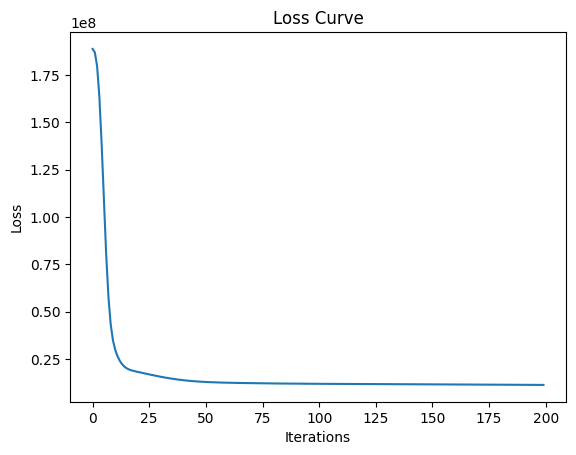

In [110]:
plt.plot(model_NN.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

<span style="color:#8bc34a;">Applying Early Stopping</span>

In [111]:
model_NN_early = MLPRegressor(
    solver='adam',
    activation='relu',
    learning_rate_init=0.01,
    hidden_layer_sizes=(12, 12),
    early_stopping=True,  # Enable early stopping
    n_iter_no_change=10,  # Stop if no improvement in 10 iterations
    random_state=42
).fit(X_train_final, y_train)


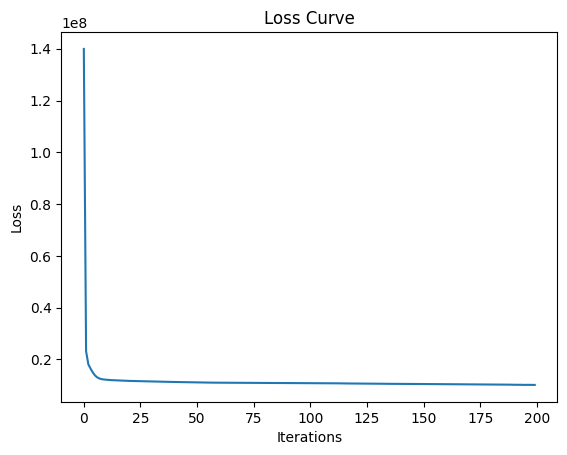

In [112]:

plt.plot(model_NN_early.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
There wasnt a significant improvement in performance after applying early stopping. The training and validation metrics remained similar to those without early stopping, indicating that the model was not overfitting significantly.
<div>

<span style="color:#8bc34a;">Trying Cross Validation with our best parameter's values</span>

In [115]:
# Hyperparameter lists to test (you can expand these later)
activation = "relu"  # Activation functions to test
lr = 0.01  # Learning rate
solver = "adam" # Solvers to test (Adam and SGD)

# Number of features in the training data (X_train)
num_features = X_train.shape[1]  # Number of features in the dataset
architectures = [(num_features, num_features)]  # Architecture with 2 layers of num_features neurons

# Initialize the results list
results = []

# Cross-validation setup with KFold (suitable for regression)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Loop over the different combinations of parameters
for layers in architectures:
    print(f"Training model with architecture: {layers}, activation: {activation}, "
            f"learning rate: {lr}, solver: {solver}...")

    # Define the model with the given parameters
    model = MLPRegressor(
        hidden_layer_sizes=layers,  # Architecture (number of layers and neurons)
        activation=activation,      # Activation function (ReLU, Tanh)
        solver=solver,              # Solver (Adam or SGD)
        learning_rate_init=lr,      # Learning rate
        max_iter=200,              # Max iterations for training
        random_state=42             # Random state for reproducibility
    )

    # Store the scores, time, and iterations for each fold
    score_train = []
    score_test = []
    timer = []
    n_iter = []

    # Apply KFold for cross-validation
    for train_index, test_index in kf.split(X_train_final, y_train):
        # Get the indexes of the observations assigned for each partition
        X_train, X_val = X_train_final.iloc[train_index], X_train_final.iloc[test_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Scale the features using MinMaxScaler
        scaler = StandardScaler().fit(X_train)
        scaled_X_train = scaler.transform(X_train)
        scaled_X_val = scaler.transform(X_val)

        # Start counting time
        start_time = time.perf_counter()
        
        # Fit the model on the training data
        model.fit(scaled_X_train, y_train_fold)
        
        # End counting time
        end_time = time.perf_counter()

        # Calculate the performance metrics (train and test R²)
        train_r2 = model.score(scaled_X_train, y_train_fold)
        test_r2 = model.score(scaled_X_val, y_val_fold)

        # Store the metrics and performance data
        score_train.append(train_r2)
        score_test.append(test_r2)
        timer.append(end_time - start_time)
        n_iter.append(model.n_iter_)

    # Calculate the average and standard deviation of the metrics
    avg_time = round(np.mean(timer), 3)
    avg_train = round(np.mean(score_train), 3)
    avg_test = round(np.mean(score_test), 3)
    std_time = round(np.std(timer), 2)
    std_train = round(np.std(score_train), 2)
    std_test = round(np.std(score_test), 2)
    avg_iter = round(np.mean(n_iter), 1)
    std_iter = round(np.std(n_iter), 1)

    # Calculate Adjusted R² (using the mean R² of the test set)
    n = len(y_train)  # Number of samples in the training set
    p = X_train_final.shape[1]  # Number of features in the training set
    mean_r2_adj = 1 - (1 - avg_test) * (n - 1) / (n - p - 1)

    # Store the results
    results.append({
        "Architecture": str(layers),
        "Activation": activation,
        "Learning Rate": lr,
        "Solver": solver,
        "Train R²": avg_train,
        "Val R²": avg_test,
        "Adjusted R²": mean_r2_adj,  # Store Adjusted R²
        "Avg Time": avg_time,
        "Std Time": std_time,
        "Avg Iterations": avg_iter,
        "Std Iterations": std_iter
    })

# Convert the list of results into a DataFrame for easier analysis
results_df = pd.DataFrame(results)
results_df

Training model with architecture: (11, 11), activation: relu, learning rate: 0.01, solver: adam...


,Architecture,Activation,Learning Rate,Solver,Train R²,Val R²,Adjusted R²,Avg Time,Std Time,Avg Iterations,Std Iterations
0,"(11, 11)",relu,0.01,adam,0.778,0.775,0.774953,5.862,0.18,198.6,4.2


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">

We trained a **Neural Network** using the MLPRegressor. The model was evaluated using K-Fold Cross-Validation with 10 folds and a Standard Scaler for feature scaling.
The Hyperparameters Tested were: 2 layers, each with num_features neurons, ReLU as activation function, learning rate of 0.01 and the solver Adam.

Results summary:
- **Train R²**: 0.778
- **Val R²**: 0.775
- **Adjusted R²**: 0.775
- **Avg Time**: 6.058 seconds per fold
- **Avg Iterations**: 200


Conclusion, the model has a good fit with the training data and performs well on the validation set. The adjusted R² value is also comparable, indicating that the model is not overfitting the data. The model's iterations have converged with an average of 200 iterations, suggesting stability in training.
</div>


### **<span style="color:#689f38;">SVM</span>**

In [52]:
# Define the SVR model 
svr = SVR()

# Define hyperparameter search space
param_distributions = {
    "C": uniform(0.1, 100),          # regularization strength
    "epsilon": uniform(0.01, 1),     # epsilon in the epsilon-SVR model
    "gamma": ["scale", "auto"],      # kernel coefficient
    "kernel": ["rbf"]                # Why RBF? Because works best for most regression problems
}

# Define K-Fold cross-validation 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up RandomizedSearchCV 
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_distributions,
    n_iter=50,                            # number of random combinations to try
    scoring="neg_mean_squared_error",     # regression metric
    cv=kfold,                             # 5-fold CV
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Fit the model on training data 
random_search.fit(X_train_final, y_train)

# Display best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate on training set
y_train_pred = random_search.predict(X_train_final)
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R2:", r2_score(y_train, y_train_pred))

# Evaluate on validation set
y_val_pred = random_search.predict(X_val_final)
print("Validation MSE:", mean_squared_error(y_val, y_val_pred))
print("Validation R2:", r2_score(y_val, y_val_pred))



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=78.06910002727692, epsilon=0.606850157946487, gamma=auto, kernel=rbf; total time=  50.9s
[CV] END C=78.06910002727692, epsilon=0.606850157946487, gamma=auto, kernel=rbf; total time=  51.3s
[CV] END C=78.06910002727692, epsilon=0.606850157946487, gamma=auto, kernel=rbf; total time=  51.5s
[CV] END C=78.06910002727692, epsilon=0.606850157946487, gamma=auto, kernel=rbf; total time=  51.6s
[CV] END C=15.699452033620265, epsilon=0.06808361216819946, gamma=auto, kernel=rbf; total time=  51.9s
[CV] END C=78.06910002727692, epsilon=0.606850157946487, gamma=auto, kernel=rbf; total time=  52.1s
[CV] END C=15.699452033620265, epsilon=0.06808361216819946, gamma=auto, kernel=rbf; total time=  52.3s
[CV] END C=37.55401188473625, epsilon=0.9607143064099162, gamma=scale, kernel=rbf; total time=  58.5s
[CV] END C=37.55401188473625, epsilon=0.9607143064099162, gamma=scale, kernel=rbf; total time=  58.7s
[CV] END C=37.55401188473625

In [117]:
# Best Hyperparameters determined by RandomizedSearchCV
best_params = {
    'C': 97.47555188414591,
    'epsilon': 0.24277134043030424,
    'gamma': 'auto',
    'kernel': 'rbf'
}

# Define the best SVR model with the hyperparameters
model_svm = SVR(
    C=best_params['C'],
    epsilon=best_params['epsilon'],
    gamma=best_params['gamma'],
    kernel=best_params['kernel']
)

# Train the model on the training set
model_svm.fit(X_train_final, y_train)

,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,tol,0.001
,C,97.47555188414591
,epsilon,0.24277134043030424
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">

We used **SVR (Support Vector Regression)** to predict the target variable. We performed hyperparameter tuning using RandomizedSearchCV with 5-fold cross-validation. The hyperparameters tuned included C (regularization), epsilon (the epsilon in the epsilon-SVR model), gamma, and kernel type (set to 'rbf').

**Best Hyperparameters:**
- **C:** 97.5
- **Epsilon:** 0.24
- **Gamma:** 'auto'
- **Kernel:** 'rbf' (Radial Basis Function)

Model Evaluation:
- **Training MSE:** 40805105
- **Training R²:** 0.56
- **Validation MSE:** 43405315
- **Validation R²:** 0.55

The best combination of hyperparameters led to an R² value of 0.56 on the training set and 0.55 on the validation set, indicating that the model is not performing reasonably well in predicting the target variable. Also, the Validation MSE was slightly higher than the Training MSE, which suggests potential overfitting or that the model could benefit from further optimization.
</div>


# **<span style="color:#689f38;">Test Prediction's File</span>**


In [236]:
# Generate predictions with the KNN model
predictions_knn = model_KNN.predict(cars_test_final)

# Create a DataFrame with predictions and IDs
df_predictions_knn = pd.DataFrame({
    'carId': cars_test_final.index,
    'price': predictions_knn
})

# Save the predictions to a CSV file
df_predictions_knn.to_csv('predictions_knn.csv', index=False)

In [237]:
# Generate predictions with the Random Forest model
predictions_rf = model_RandomForest.predict(cars_test_final)

# Create the DataFrame with predictions and IDs
df_predictions_rf = pd.DataFrame({
    'carId': cars_test_final.index,
    'price': predictions_rf
})

# Save the predictions to a CSV file
df_predictions_rf.to_csv('predictions_rf.csv', index=False)

In [238]:
# Generate predictions with the Decision Tree model
predictions_dt = model_DecisionTree.predict(cars_test_final)


# Create a DataFrame with predictions and IDs
df_predictions_dt = pd.DataFrame({
    'carId': cars_test_final.index,
    'price': predictions_dt
})

# Save the predictions to a CSV file
df_predictions_dt.to_csv('predictions_dt.csv', index=False)

In [239]:
# Generate predictions with the MLPRegressor model
predictions_nn = model_NN.predict(cars_test_final)


# Create a DataFrame with predictions and IDs
df_predictions_nn = pd.DataFrame({
    'carId': cars_test_final.index,
    'price': predictions_nn
})

# Save the predictions to a CSV file
df_predictions_nn.to_csv('predictions_nn.csv', index=False)

In [240]:
# Generate predictions with the trained SVM model
predictions_svm = model_svm.predict(cars_test_final)

# Create a DataFrame with predictions and IDs
df_predictions_svm = pd.DataFrame({
    'carId': cars_test_final.index,
    'price': predictions_svm
})

# Save the predictions to a CSV file
df_predictions_svm.to_csv('predictions_svm.csv', index=False)

In [230]:


# Define a list to hold the performance metrics of each model
metrics = []

# Function to evaluate each model and calculate metrics for both train and validation data
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    # Train predictions
    train_predictions = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    
    # Validation predictions
    val_predictions = model.predict(X_val)
    val_mae = mean_absolute_error(y_val, val_predictions)
    val_mse = mean_squared_error(y_val, val_predictions)
    val_r2 = r2_score(y_val, val_predictions)
    
    metrics.append({
        'Model': model_name,
        'Train MAE': train_mae,
        'Train MSE': train_mse,
        'Train R²': train_r2,
        'Validation MAE': val_mae,
        'Validation MSE': val_mse,
        'Validation R²': val_r2
    })

# Evaluate each model and store their metrics

# For RandomForestRegressor
evaluate_model(model_RandomForest, X_train_final, y_train, X_val_final, y_val, 'RandomForest')

# For KNeighborsRegressor
evaluate_model(model_KNN, X_train_final, y_train, X_val_final, y_val, 'KNeighbors')

# For DecisionTreeRegressor
evaluate_model(model_DecisionTree, X_train_final, y_train, X_val_final, y_val, 'DecisionTree')

# For MLPRegressor (Neural Network)
evaluate_model(model_NN, X_train_final, y_train, X_val_final, y_val, 'MLPRegressor')

# For SVR (Support Vector Regression)
evaluate_model(model_svm, X_train_final, y_train, X_val_final, y_val, 'SVR')

# Create a DataFrame from the metrics list
compare_model_df = pd.DataFrame(metrics)
compare_model_df

,Model,Train MAE,Train MSE,Train R²,Validation MAE,Validation MSE,Validation R²
0,RandomForest,1256.646826,4.452051e+06,0.952461,1740.144410,8.960882e+06,0.908386
1,KNeighbors,59.654118,1.575278e+05,0.998318,1970.065323,1.197601e+07,0.877561
2,DecisionTree,2348.778211,1.473206e+07,0.842692,2486.780001,1.611606e+07,0.835234
3,MLPRegressor,3173.132237,2.251257e+07,0.759612,3209.817761,2.353614e+07,0.759373
4,SVR,3051.179220,2.360231e+07,0.747975,3099.639709,2.539943e+07,0.740323


### **<span style="color:#689f38;">Final Model Selection</span>**

<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
The models were evaluated using training and validation metrics with the goal of predicting car prices accurately while ensuring good generalization. <br>
Although the K-Nearest Neighbors model achieved very low training error, it exhibited a large gap in validation performance, indicating overfitting. The Decision Tree, MLP, and SVR models showed weaker validation results.<br>
 The RandomForest model achieved the lowest validation MAE and MSE, as well as the highest validation R², while maintaining a reasonable difference between training and validation performance. <br>
 Therefore, RandomForest was selected as the final model for car price prediction.
</div>

### **<span style="color:#689f38;">PIPELINE</span>**

In [ ]:
# Transformer to clip 'year' feature using windorizing
class YearClipper(BaseEstimator, TransformerMixin):
    def _init_(self, min_year=2020):
        self.min_year = min_year

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X_train.copy()
        if "year" in X.columns:
            X["year"] = X["year"].clip(lower=self.min_year)
        return X

In [ ]:
# Transformer to clip outliers using IQR method
class IQRClipper(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols

    def fit(self, X, y=None):
        self.limits_ = {}
        for col in self.cols:
            if col in X.columns:
                Q1 = X[col].quantile(0.25)
                Q3 = X[col].quantile(0.75)
                IQR = Q3 - Q1
                self.limits_[col] = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
        return self

    def transform(self, X):
        X = X.copy()
        for col, (lo, hi) in self.limits_.items():
            X[col] = X[col].clip(lo, hi)
        return X

In [ ]:
# Transformer to create new features
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, current_year=2025):
        self.current_year = current_year

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X["car_age"] = (self.current_year - X["year"]).clip(lower=0)
        X["mileage_per_year"] = X["mileage"] / X["car_age"].replace(0, 1)
        return X

In [ ]:
# Transformer to encode categorical features based on frequency
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols

    def fit(self, X, y=None):
        self.freqs_ = {
            col: X[col].value_counts(normalize=True)
            for col in self.cols if col in X.columns
        }
        return self

    def transform(self, X):
        X = X.copy()
        for col, freq in self.freqs_.items():
            X[f"{col}_freq"] = X[col].map(freq).fillna(0)
        return X

In [360]:
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()

In [ ]:
# Pipeline's structure for numerical features
num_pipeline = Pipeline([
    ("median_imputer", SimpleImputer(strategy="median")),
    ("scaler_for_knn", StandardScaler()),
    ("knn_imputer", KNNImputer(n_neighbors=5)),
    ("year_clipping", YearClipper()),
    ("iqr_clipping", IQRClipper(cols=["tax", "mpg", "mileage", "engineSize"])),
    ("feature_engineering", FeatureEngineer(current_year=2025)),
    ("final_scaler", StandardScaler())
])

In [ ]:
# Pipeline's structure for categorical features
cat_pipeline = Pipeline([
    ("mode_imputer", SimpleImputer(strategy="most_frequent")),
    ("frequency_encoding", FrequencyEncoder(cols=["brand", "model"])),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

In [363]:
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

In [ ]:
# Final pipeline combining preprocessing and the best model
final_pipeline = Pipeline([
    ("Preprocessing", preprocessor),
    ("Model", model_RandomForest) 
])

<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
We decided to only use Random Forest for the model in the pipeline since it's our best model. 
</div>

In [ ]:
set_config(display="diagram")
final_pipeline

,steps,"[('Preprocessing', ...), ('Model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
